In [1]:
import pandas
import numpy
import matplotlib.pyplot as pyplot
import datetime
import calendar
import osmnx
import statistics
import math
import copy
import tabulate
import time

import sktime
import sktime.transformations.panel.rocket
import sktime.classification.distance_based
import sktime.classification.hybrid
import sktime.transformations.panel.reduce
import sktime.classification.ensemble
import sktime.classification.shapelet_based
import sktime.classification.sklearn

import sklearn
import sklearn.preprocessing
import sklearn.linear_model
import sklearn.model_selection
import sklearn.metrics
import sklearn.pipeline
import sklearn.feature_selection
import sklearn.cluster
import sklearn.decomposition
import sklearn.calibration

import scipy.stats
import scipy.spatial


pandas.options.display.float_format = '{:.4f}'.format
numpy.set_printoptions(suppress=True)


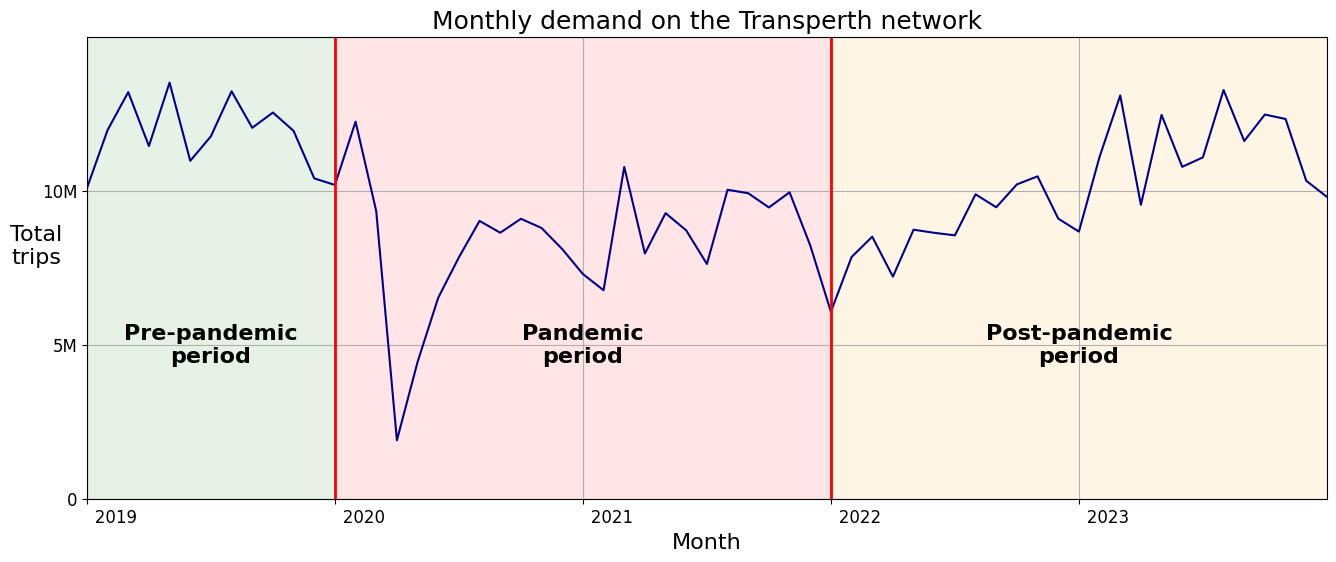

In [2]:
def get_dayofweek(dayname):
    dayofweek = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
    }
    return dayofweek[dayname]

linelist = numpy.array(['City Stations', 'Fremantle Line', 'Midland Line', 'Armadale Line', 'Joondalup Line', 'Mandurah Line'])
collist  = numpy.array(['grey'           , 'royalblue' , 'mediumvioletred'   , 'gold'      , 'yellowgreen'     , 'orange'])
#                              0                1                2                3                4                 5

contextlist = numpy.array([
    [3, 1, 1, 4],  # Burswood Stn 0
    [3, 4, 1, 4],  # Victoria Park Stn 1
    [3, 4, 1, 4],  # Carlisle Stn 2
    [3, 4, 1, 4],  # Oats Street Stn 3
    [3, 1, 1, 3],  # Welshpool Stn 4
    [3, 4, 2, 3],  # Queens Park Stn 5
    [3, 4, 2, 3],  # Cannington Stn 6
    [3, 4, 2, 2],  # Thornlie Stn 7
    [3, 1, 2, 2],  # Beckenham Stn 8
    [3, 1, 2, 2],  # Kenwick Stn 9
    [3, 1, 2, 1],  # Maddington Stn 10
    [3, 1, 3, 1],  # Gosnells Stn 11
    [3, 1, 3, 1],  # Seaforth Stn 12
    [3, 1, 3, 1],  # Kelmscott Stn 13
    [3, 1, 3, 1],  # Challis Stn 14
    [3, 4, 3, 1],  # Sherwood Stn 15
    [3, 4, 4, 1],  # Armadale Stn 16
    [0, 0, 0, 5],  # Perth Stn 17
    [0, 2, 0, 5],  # McIver Stn 18
    [0, 2, 0, 5],  # Claisebrook Stn 19
    [1, 4, 0, 5],  # City West Stn 20
    [1, 4, 1, 5],  # West Leederville Stn 21
    [1, 4, 1, 5],  # Subiaco Stn 22
    [1, 4, 1, 5],  # Daglish Stn 23
    [1, 4, 1, 5],  # Shenton Park Stn 24
    [1, 1, 1, 5],  # Karrakatta Stn 25
    [1, 4, 1, 5],  # Loch Street Stn 26
    [1, 4, 2, 5],  # Claremont Stn 27
    [1, 4, 2, 5],  # Swanbourne Stn 28
    [1, 4, 2, 5],  # Grant Street Stn 29
    [1, 4, 2, 5],  # Cottesloe Stn 30
    [1, 2, 2, 5],  # Mosman Park Stn 31
    [1, 2, 2, 5],  # Victoria Street Stn 32
    [1, 4, 2, 4],  # North Fremantle Stn 33
    [1, 1, 1, 4],  # Fremantle Stn 34
    [4, 4, 1, 5],  # Leederville Stn 35
    [4, 2, 2, 5],  # Glendalough Stn 36
    [4, 3, 2, 4],  # Stirling Stn 37
    [4, 3, 2, 4],  # Warwick Stn 38
    [4, 3, 2, 4],  # Greenwood Stn 39
    [4, 3, 3, 4],  # Whitfords Stn 40
    [4, 3, 3, 3],  # Edgewater Stn 41
    [4, 1, 3, 3],  # Joondalup Stn 42
    [4, 4, 4, 3],  # Currambine Stn 43
    [4, 4, 4, 2],  # Clarkson Stn 44
    [0, 4, 0, 5],  # Elizabeth Quay Stn 45
    [5, 4, 1, 5],  # Canning Bridge Stn 46
    [5, 3, 2, 5],  # Bull Creek Stn 47
    [5, 3, 2, 5],  # Murdoch Stn 48
    [5, 3, 3, 4],  # Cockburn Central Stn 49
    [5, 0, 3, 4],  # Aubin Grove Stn 50
    [5, 1, 4, 2],  # Kwinana Stn 51
    [5, 1, 4, 2],  # Wellard Stn 52
    [5, 3, 5, 1],  # Rockingham Stn 53
    [5, 4, 5, 1],  # Warnbro Stn 54
    [5, 1, 7, 1],  # Mandurah Stn 55
    [2, 2, 1, 4],  # East Perth Stn 56
    [2, 2, 1, 5],  # Mt Lawley Stn 57
    [2, 2, 1, 4],  # Maylands Stn 58
    [2, 4, 1, 4],  # Meltham Stn 59
    [2, 4, 1, 4],  # Bayswater Stn 60
    [2, 1, 2, 3],  # Ashfield Stn 61
    [2, 4, 2, 3],  # Bassendean Stn 62
    [2, 1, 2, 3],  # Success Hill Stn 63
    [2, 1, 2, 2],  # Guildford Stn 64
    [2, 1, 2, 2],  # East Guildford Stn 65
    [2, 1, 2, 2],  # Woodbridge Stn 66
    [2, 1, 2, 2],  # Midland Stn 67
    [4, 0, 5, 2]   # Butler Stn 68
])


transperthmonthlydata = [
    10081138, 11967750, 13201548, 11450802, 13509992, 10969471, 11767342, 13228315, 12042885, 12537394, 11944242, 10400359,
    10187994, 12242377, 9337564, 1897433, 4439969, 6526522, 7837865, 9019858, 8635796, 9088936, 8789512, 8105264,
    7294925, 6768569, 10771389, 7960959, 9271876, 8711857, 7620686, 10031748, 9918186, 9456362, 9948102, 8224957,
    6069919, 7846424, 8507580, 7211581, 8734498, 8632949, 8551552, 9882702, 9461904, 10205965, 10466168, 9094728,
    8672434, 11099638, 13093022, 9542333, 12462171, 10775074, 11083706, 13268997, 11614292, 12473841, 12328847, 10323519, 9800000
]

figure1 = pyplot.figure()
figure1.set_figwidth(16)
figure1.set_figheight(6)
pyplot.plot([x / 1000 for x in transperthmonthlydata], color="darkblue")
pyplot.yticks(numpy.arange(0, 15000, 5000), ["0", "5M", "10M"], fontsize = 12)
pyplot.ylabel("Total\ntrips", fontsize = 16, rotation=0)
pyplot.xticks(numpy.arange(0, 60, 12), ["           2019", "           2020", "           2021", "           2022", "           2023"], fontsize = 12)
pyplot.xlabel("Month", fontsize = 16)
pyplot.title("Monthly demand on the Transperth network", fontsize = 18)
pyplot.grid()
ax = pyplot.gca()
#ax.set_xlim([-2, 62])
ax.set_xlim([0, 60])
ax.set_ylim([0, 15000])
#pyplot.plot([0, 0], [0, 15000], color='red', linestyle='-', linewidth=2)
pyplot.plot([12, 12], [0, 15000], color='red', linestyle='-', linewidth=2)
pyplot.plot([36, 36], [0, 15000], color='red', linestyle='-', linewidth=2)
#pyplot.plot([60, 60], [0, 15000], color='red', linestyle='-', linewidth=2)
ax.add_patch(pyplot.Rectangle((0,0), 12, 15000, color='green', alpha=0.10))
ax.text(6, 5000, 'Pre-pandemic\nperiod', fontsize=16, ha='center', va='center', color='black', fontweight='bold')
ax.add_patch(pyplot.Rectangle((12,0), 24, 15000, color='red', alpha=0.10))
ax.text(24, 5000, 'Pandemic\nperiod', fontsize=16, ha='center', va='center', color='black', fontweight='bold')
ax.add_patch(pyplot.Rectangle((36,0), 24, 15000, color='orange', alpha=0.10))
ax.text(48, 5000, 'Post-pandemic\nperiod', fontsize=16, ha='center', va='center', color='black', fontweight='bold')
pyplot.show()

In [3]:
def read_monthly_data_in(filename):
    carddata = pandas.read_csv(filename, usecols=['OnDate', 'OnLocation', 'OffDate', 'OffLocation'], na_values=['Unknown'], engine='c')
    carddata = carddata.dropna()

    carddata['OnDate'] = pandas.to_datetime(carddata['OnDate'].astype(str).str[:-4], format='%Y%m%d%H')
    carddata['OnDayName'] = carddata['OnDate'].dt.day_name().astype(str)
    carddata['OnDay'] = carddata['OnDate'].dt.day.astype('int8')
    carddata['OnHour'] = carddata['OnDate'].dt.hour.astype('int8')

    carddata['OffDate'] = pandas.to_datetime(carddata['OffDate'].astype(str).str[:-4], format='%Y%m%d%H')
    carddata['OffDayName'] = carddata['OffDate'].dt.day_name().astype(str)
    carddata['OffDay'] = carddata['OffDate'].dt.day.astype('int8')
    carddata['OffHour'] = carddata['OffDate'].dt.hour.astype('int8')


    month = carddata['OnDate'].iloc[0].month
    year = carddata['OnDate'].iloc[0].year

    carddata['OnLocation'] = carddata['OnLocation'].astype('int16')
    carddata['OnDayName'] = carddata['OnDayName'].astype(str)
    carddata = carddata.drop(columns=['OnDate'])

    carddata['OffLocation'] = carddata['OffLocation'].astype('int16')
    carddata['OffDayName'] = carddata['OffDayName'].astype(str)
    carddata = carddata.drop(columns=['OffDate'])
    
    monthlydata = [carddata, month, year]
    return monthlydata

def read_stations_in(trainfile):
    trainstations = pandas.read_csv(trainfile, usecols=['Station', 'StationRefNo', 'X', 'Y'])
    stoplocations = trainstations.reindex(['StationRefNo', 'Station', 'X', 'Y'], axis=1)
    stoplocations = stoplocations.rename(columns={'StationRefNo': 'StationID', 'Station': 'StationName'})
    return stoplocations

def read_sep2023_in(datadir, locations):
    monthlydata = read_monthly_data_in(datadir + "monthly_sep2023_short.csv")
    carddata = monthlydata[0]
    ondatacounts = carddata.groupby(['OnLocation', 'OnDay', 'OnHour']).size().reset_index(name='Count')
    offdatacounts = carddata.groupby(['OffLocation', 'OffDay', 'OffHour']).size().reset_index(name='Count')
    ondatacounts = ondatacounts[ondatacounts['OnDay'] == 1]
    offdatacounts = offdatacounts[offdatacounts['OffDay'] == 1]
    
    separray = numpy.zeros(shape=(2, 69, 24))
    for ignore, row in ondatacounts.iterrows():
        if row['OnLocation'] in locations:
            locationindex = numpy.where(locations == row['OnLocation'])[0][0]
            separray[0][locationindex][row['OnHour']] = row['Count']
    for ignore, row in offdatacounts.iterrows():
        if row['OffLocation'] in locations:
            locationindex = numpy.where(locations == row['OffLocation'])[0][0]
            separray[1][locationindex][row['OffHour']] = row['Count']

    return separray


In [4]:
def plot_profile(profile, stationid, stoplocations, type, month, year, weekday=0):
    stationname = stoplocations[stoplocations['StationID'] == stationid]['StationName'].iloc[0]
    flatprofile = profile.flatten()

    if type == 'demand':
        starttick = 24
        tickinterval = 24
        typetext = 'Demand Profile'
        col = 'blue'
    else:
        starttick = (7 - weekday) * 24
        tickinterval = 168
        typetext = 'Daily Profile'
        col = 'orange'

    pyplot.plot(flatprofile, linestyle='-', color=col)

    monthname = calendar.month_name[month]
    pyplot.title(str(stationname) + ' (' + str(stationid) + ') ' + typetext + ' for ' + str(monthname) + ' ' + str(year))
    pyplot.xlabel('Hour')
    pyplot.ylabel('Boardings')
    
    arraylen = len(flatprofile)
    ticklocations = numpy.arange(starttick, arraylen, tickinterval).tolist()
    pyplot.xticks(ticks=ticklocations)
    pyplot.grid(True)

    pyplot.show()

def multi_daily_profile(profilelist, infolist, stationind, stoplocations, months):
    stationname = stoplocations['StationName'].iloc[stationind]
    pyplot.figure(figsize=(10, 4))
    colors = ['tab:green', 'tab:red', 'purple', 'yellow', 'tab:orange']
    for monthind in range(len(profilelist)):
        if months[monthind] != '':
            bstdarray, astdarray = get_average_profile(profilelist, infolist, monthind, stationind, 24, std=False)
            if monthind == 0:
                multiplier = max(bstdarray.max(), astdarray.max())/100
            bdivarray = numpy.divide(bstdarray, multiplier)
            adivarray = numpy.divide(astdarray, multiplier)
            pyplot.plot(bdivarray, linestyle='-', color=colors[monthind])
            pyplot.plot(adivarray, linestyle='--', color=colors[monthind])

    pyplot.title('Demand profiles for ' + str(stationname) + ' station', fontsize=16)
    pyplot.xlabel('Hour', fontsize=12)
    pyplot.ylabel('Demand', fontsize=12)
    suffixes = ['Boardings', 'Alightings']
    lessmonths = [item for item in months if item != '']
    expanded = [str(item) + " " + str(suffix) for item in lessmonths for suffix in suffixes]
    pyplot.legend(expanded)
        
    pyplot.show()

def get_average_profile(profilelist, infolist, monthind, stationind, week, std):
    btotalarray = numpy.zeros(week)
    atotalarray = numpy.zeros(week)
    numcount = 0
    for profileind in range(len(profilelist[monthind][0])):
        bprofile = profilelist[monthind][0][profileind]
        aprofile = profilelist[monthind][1][profileind]
        info = infolist[monthind][profileind]
        station = info[0]
        if station == stationind:
            btotalarray += bprofile
            atotalarray += aprofile
            numcount += 1
    btotalarray = btotalarray/numcount
    atotalarray = atotalarray/numcount
    if std == True:
        maxsum = max([numpy.sum(btotalarray), numpy.sum(atotalarray)])
        bstdarray = copy.deepcopy(sum1000_standardise(btotalarray, maxsum))
        astdarray = copy.deepcopy(sum1000_standardise(atotalarray, maxsum))
        return bstdarray, astdarray
    else:
        return btotalarray, atotalarray

def multi_weekly_profile(profilelist, infolist, stationind, stoplocations, months):
    stationname = stoplocations['StationName'].iloc[stationind]
    pyplot.figure(figsize=(16, 6))
    colors = ['tab:green', 'tab:red', 'purple', 'yellow', 'tab:orange']
    multiplier = 0
    for monthind in range(len(profilelist)):
        if months[monthind] != '':
            bstdarray, astdarray = get_average_profile(profilelist, infolist, monthind, stationind, 120, std=True)
            if monthind == 0:
                multiplier = max(bstdarray.max(), astdarray.max())/100
            bdivarray = numpy.divide(bstdarray, multiplier)
            adivarray = numpy.divide(astdarray, multiplier)
            #pyplot.plot(totalarray, linestyle='-')
            pyplot.plot(bdivarray, linestyle='-', color=colors[monthind])
            pyplot.plot(adivarray, linestyle='--', color=colors[monthind])
            #pyplot.plot(bstdarray, linestyle='-', color=colors[monthind])
            #pyplot.plot(astdarray, linestyle='--', color=colors[monthind])

    pyplot.title('Scaled demand profiles for ' + str(stationname), fontsize=18)
    pyplot.xlabel('Hour', fontsize=14)
    pyplot.ylabel('Scaled demand percentage', fontsize=14)
    suffixes = ['Boardings', 'Alightings']
    lessmonths = [item for item in months if item != '']
    expanded = [str(item) + " " + str(suffix) for item in lessmonths for suffix in suffixes]
    pyplot.legend(expanded, fontsize=11)
        
    pyplot.show()

def ampm_profile(demandprofiles, stationind, month, stoplocations):
    boardingprofile = demandprofiles[month][0][0][stationind][0].flatten()
    alightingprofile = demandprofiles[month][0][1][stationind][0].flatten()
    profiles = [boardingprofile, alightingprofile]

    stationname = stoplocations['StationName'].iloc[stationind]

    profiles = [boardingprofile, alightingprofile]
    plotmax = numpy.max([numpy.max(profile) for profile in profiles])
    xticks = numpy.arange(0, 24, 3)
    labels = ['12 AM', '3 AM', '6 AM', '9 AM', '12 PM', '3 PM', '6 PM', '9 PM']

    fig, axes = pyplot.subplots(nrows=2, ncols=1, figsize=(12, 6))
    for ind in range(2):
        profile = profiles[ind]
        axes[ind].plot(profile, color="black")

        if ind == 0:
            lrect = pyplot.Rectangle((-10,-500), 21.5, 1000, color='red', alpha=0.15)
            rrect = pyplot.Rectangle((11.5,-500), 13, 1000, color='blue', alpha=0.15)
            axes[ind].set_title("Boarding demand profile", fontsize=16)
            axes[ind].text(3, (1.2*plotmax)*0.6, 'Generated\ncommuters', fontsize=18, ha='center', va='center', color='grey', fontweight='bold')
            axes[ind].text(20, (1.2*plotmax)*0.6, 'Attracted\ncommuters', fontsize=18, ha='center', va='center', color='grey', fontweight='bold')
        else:
            lrect = pyplot.Rectangle((-10,-500), 21.5, 1000, color='blue', alpha=0.15)
            rrect = pyplot.Rectangle((11.5,-500), 13, 1000, color='red', alpha=0.15)
            axes[ind].set_title("Alighting demand profile", fontsize=16)
            axes[ind].text(3, (1.2*plotmax)*0.6, 'Attracted\ncommuters', fontsize=18, ha='center', va='center', color='grey', fontweight='bold')
            axes[ind].text(20, (1.2*plotmax)*0.6, 'Generated\ncommuters', fontsize=18, ha='center', va='center', color='grey', fontweight='bold')
            axes[ind].set_xlabel("Hour", fontsize=12)
            
        axes[ind].add_patch(lrect)
        axes[ind].add_patch(rrect)
        axes[ind].set_xlim([-0.5, 23.5])
        axes[ind].set_ylim([-(0.1*plotmax), 1.2*plotmax])
        axes[ind].set_xticks(xticks)
        axes[ind].set_xticklabels(labels)
        axes[ind].set_ylabel("Hourly demand", fontsize=12)

    pyplot.tight_layout()
    pyplot.subplots_adjust(hspace=0.3)
    
    fig.suptitle("Split commuter demand profiles for " + str(stationname), fontsize=18, y=1.04)
    pyplot.show()

def single_profile(demandprofiles, stationind, stoplocations):
    boardingprofile = demandprofiles[0][0][0][stationind][0].flatten()
    alightingprofile = demandprofiles[0][0][1][stationind][0].flatten()
    length = len(boardingprofile)

    stationname = stoplocations['StationName'].iloc[stationind]
    
    xticks = numpy.arange(0, length, 3)
    if length == 24:
        xticks = numpy.arange(0, length, 3)
        labels = ['12 AM', '3 AM', '6 AM', '9 AM', '12 PM', '3 PM', '6 PM', '9 PM']
        width = 1.5
        ticksize = 12
        legendsize = 14
        titlestring = "Boarding and Alighting demand profiles for "
    else:
        xticks = numpy.arange(0, length+1, 12)
        labels = ['12 AM', '12 PM', '12 AM', '12 PM', '12 AM', '12 PM', '12 AM', '12 PM', '12 AM', '12 PM', '12 AM']
        width = 1
        ticksize = 10
        legendsize = 12
        titlestring = "Boarding and Alighting weekly profiles for "

    pyplot.figure(figsize=(10,4))
    pyplot.plot(boardingprofile, linestyle='-', color="darkblue", linewidth=width)
    pyplot.plot(alightingprofile, linestyle='-', color="red", linewidth=width)
    pyplot.title(titlestring + str(stationname), fontsize=16)
    pyplot.xticks(xticks, labels=labels, fontsize=ticksize)
    pyplot.yticks(fontsize=ticksize)
    pyplot.xlabel("Hour", fontsize=12)
    pyplot.ylabel("Hourly demand", fontsize=12)
    pyplot.legend(['Boardings', 'Alightings'], fontsize=legendsize)
    pyplot.show()



In [5]:
def create_daily_arrays(locations, month, year):
    monthlen = calendar.monthrange(year, month)[1]
    loclen = len(locations)
    profilearrays = numpy.zeros(shape=(2, loclen, monthlen, 24))
    return profilearrays

def add_trip_to_daily_array(data, profilearrays, locations):
    ondatacounts = data.groupby(['OnLocation', 'OnDay', 'OnHour']).size().reset_index(name='Count')
    offdatacounts = data.groupby(['OffLocation', 'OffDay', 'OffHour']).size().reset_index(name='Count')
    for ignore, row in ondatacounts.iterrows():
        if row['OnLocation'] in locations:
            locationindex = numpy.where(locations == row['OnLocation'])[0][0]
            dayindex = row['OnDay']-1
            profilearrays[0][locationindex][dayindex][row['OnHour']] = row['Count']
    for ignore, row in offdatacounts.iterrows():
        if row['OffLocation'] in locations:
            locationindex = numpy.where(locations == row['OffLocation'])[0][0]
            dayindex = row['OffDay']-1
            profilearrays[1][locationindex][dayindex][row['OffHour']] = row['Count']

def create_daily_demand_profiles(monthlydata, locations, problemdays):
    data = monthlydata[0]
    month = monthlydata[1]
    year = monthlydata[2]
    profilearrays = create_daily_arrays(locations, month, year)

    outlierless_data = data[~data['OnDay'].isin(problemdays)]
    add_trip_to_daily_array(outlierless_data, profilearrays, locations)

    profiletuple = (profilearrays, month, year)

    return profiletuple

def vizualise_months(monthlydata, locations, stoplocations):
    data = monthlydata[0]
    month = monthlydata[1]
    year = monthlydata[2]
    profilearrays = create_daily_arrays(locations, month, year)

    relevant_data = data[data['OnLocation'].isin(locations)]
    add_trip_to_daily_array(relevant_data, profilearrays, locations)

    weekday = calendar.monthrange(year, month)[0]
    loclen = profilearrays.shape[1]
    for stationind in range(loclen):
        plot_profile(profilearrays[0][stationind], locations[stationind], stoplocations, 'daily', month, year, weekday)

In [6]:
def get_monday_inds(year, month):
    firstweekday = calendar.monthrange(year, month)[0]
    monthlen = calendar.monthrange(year, month)[1]
    if firstweekday == 0:
        firstmonday = 0
    else:
        firstmonday = 7 - firstweekday
    
    mondaylist = []
    for day in range(firstmonday, monthlen, 7):
        if (day+4) < monthlen or year == 2023: # 2023 exception
            mondaylist.append(day)
    return mondaylist

def create_weekly_arrays(locations, mondaylist):
    fullweeknum = len(mondaylist)
    loclen = len(locations)
    profilearrays = numpy.zeros(shape=(2, loclen, fullweeknum, 120))
    return profilearrays

def get_week_index(day, mondaylist):
    for mondayind in range(len(mondaylist)):
        monday = mondaylist[mondayind]
        if day >= monday and day <= monday+4:
            return mondayind
    return -1

def add_trip_to_weekly_array(data, profilearrays, locations, mondaylist):
    ondatacounts = data.groupby(['OnLocation', 'OnDay', 'OnHour']).size().reset_index(name='Count')
    offdatacounts = data.groupby(['OffLocation', 'OffDay', 'OffHour']).size().reset_index(name='Count')
    for ignore, row in ondatacounts.iterrows():
        if row['OnLocation'] in locations:
            weekindex = get_week_index(row['OnDay']-1, mondaylist)
            if weekindex != -1:
                locationindex = numpy.where(locations == row['OnLocation'])[0][0]
                weekoffset = (row['OnDay']-1) - mondaylist[weekindex]
                hourindex = (weekoffset * 24) + row['OnHour']
                profilearrays[0][locationindex][weekindex][hourindex] = row['Count']
    for ignore, row in offdatacounts.iterrows():
        if row['OffLocation'] in locations:
            weekindex = get_week_index(row['OffDay']-1, mondaylist)
            if weekindex != -1:
                locationindex = numpy.where(locations == row['OffLocation'])[0][0]
                weekoffset = (row['OffDay']-1) - mondaylist[weekindex]
                hourindex = (weekoffset * 24) + row['OffHour']
                profilearrays[1][locationindex][weekindex][hourindex] = row['Count']


def create_weekly_demand_profiles(monthlydata, locations, problemdays, septemberdays):
    data = monthlydata[0]
    month = monthlydata[1]
    year = monthlydata[2]
    mondaylist = get_monday_inds(year, month)
    profilearrays = create_weekly_arrays(locations, mondaylist)

    add_trip_to_weekly_array(data, profilearrays, locations, mondaylist)
    
    if year == 2023:
        for stationind in range(len(septemberdays[0])):
            profilearrays[0][stationind][3][-24:] = septemberdays[0][stationind]
            profilearrays[1][stationind][3][-24:] = septemberdays[1][stationind]

    profiletuple = (profilearrays, month, year)

    return profiletuple

In [7]:
def calc_weekends(month, year):
    weekendlist = []
    weekday = calendar.monthrange(year, month)[0]
    monthrange = calendar.monthrange(year, month)[1]

    for dayind in range(1, monthrange+1):
        dayofweek = (weekday + (dayind - 1)) % 7
        if dayofweek in [5, 6]:
            weekendlist.append(dayind)
    return weekendlist

def profile_sums(demandprofiles, problemdays, forttest, profiletype):
    sumlist = []
    tol = 20

    for monthind in range(len(demandprofiles)): # each monthly tuple
        boardingprofiles = demandprofiles[monthind][0][0] # demand profile of shape (69,31,24)
        alightingprofiles = demandprofiles[monthind][0][1] # demand profile of shape (69,31,24)

        month = demandprofiles[monthind][1]
        year = demandprofiles[monthind][2]
        weekendlist = calc_weekends(month, year)

        stationlist = []
        for stationind in range(boardingprofiles.shape[0]):
            daylist = []
            for dayind in range(boardingprofiles.shape[1]):
                if (dayind+1) not in problemdays[monthind]:
                    if (dayind+1) not in weekendlist:
                        boardingprofile = pandas.Series(boardingprofiles[stationind][dayind])
                        alightingprofile = pandas.Series(alightingprofiles[stationind][dayind])
                        if profiletype == 'home':
                            bsum = numpy.sum(boardingprofile[:12])
                            asum = numpy.sum(alightingprofile[12:])
                            tol = 10
                        elif profiletype == 'work':
                            bsum = numpy.sum(boardingprofile[12:])
                            asum = numpy.sum(alightingprofile[:12])
                            tol = 10
                        else:
                            bsum = numpy.sum(boardingprofile)
                            asum = numpy.sum(alightingprofile)
                        if bsum >= tol and asum >= tol:
                            daylist.append(bsum+asum)
                            continue

                if forttest == False:
                    daylist.append(-1)
            stationlist.append(daylist)
        sumlist.append(stationlist)
    return sumlist

def profile_means(sumlist):
    meanlist = []
    for monthsums in sumlist: # each month in the data
        monthlist = []
        for stationsums in monthsums: # each station in a month
            daycount = 0
            daytotal = 0
            for daysum in stationsums: # each day for the station
                if daysum != -1:
                    daytotal += daysum
                    daycount += 1
            if daycount != 0:
                stationmean = daytotal/daycount
            else:
                stationmean = 0
            monthlist.append(stationmean)
        meanlist.append(monthlist)

    return meanlist

    Year 1  Year 2         Station Name       Line  Type  P-value
4     2019    2023         Armadale Stn   Armadale     4   0.8054
3     2019    2023       Maddington Stn   Armadale     1   0.7918
9     2019    2023      Glendalough Stn  Joondalup     2   0.7715
2     2019    2023          Kenwick Stn   Armadale     1   0.7713
17    2019    2023     Success Hill Stn    Midland     1   0.6623
0     2019    2023        Welshpool Stn   Armadale     1   0.6595
18    2019    2023        Guildford Stn    Midland     1   0.6305
11    2019    2023         Maylands Stn    Midland     2   0.3603
6     2019    2023      Claisebrook Stn       City     2   0.3279
19    2019    2023       Woodbridge Stn    Midland     1   0.1854
1     2019    2023      Queens Park Stn   Armadale     4   0.1672
10    2019    2023   Canning Bridge Stn   Mandurah     4   0.1654
8     2019    2023  North Fremantle Stn  Fremantle     4   0.0888
15    2019    2023       Bassendean Stn    Midland     4   0.0821
5     2019

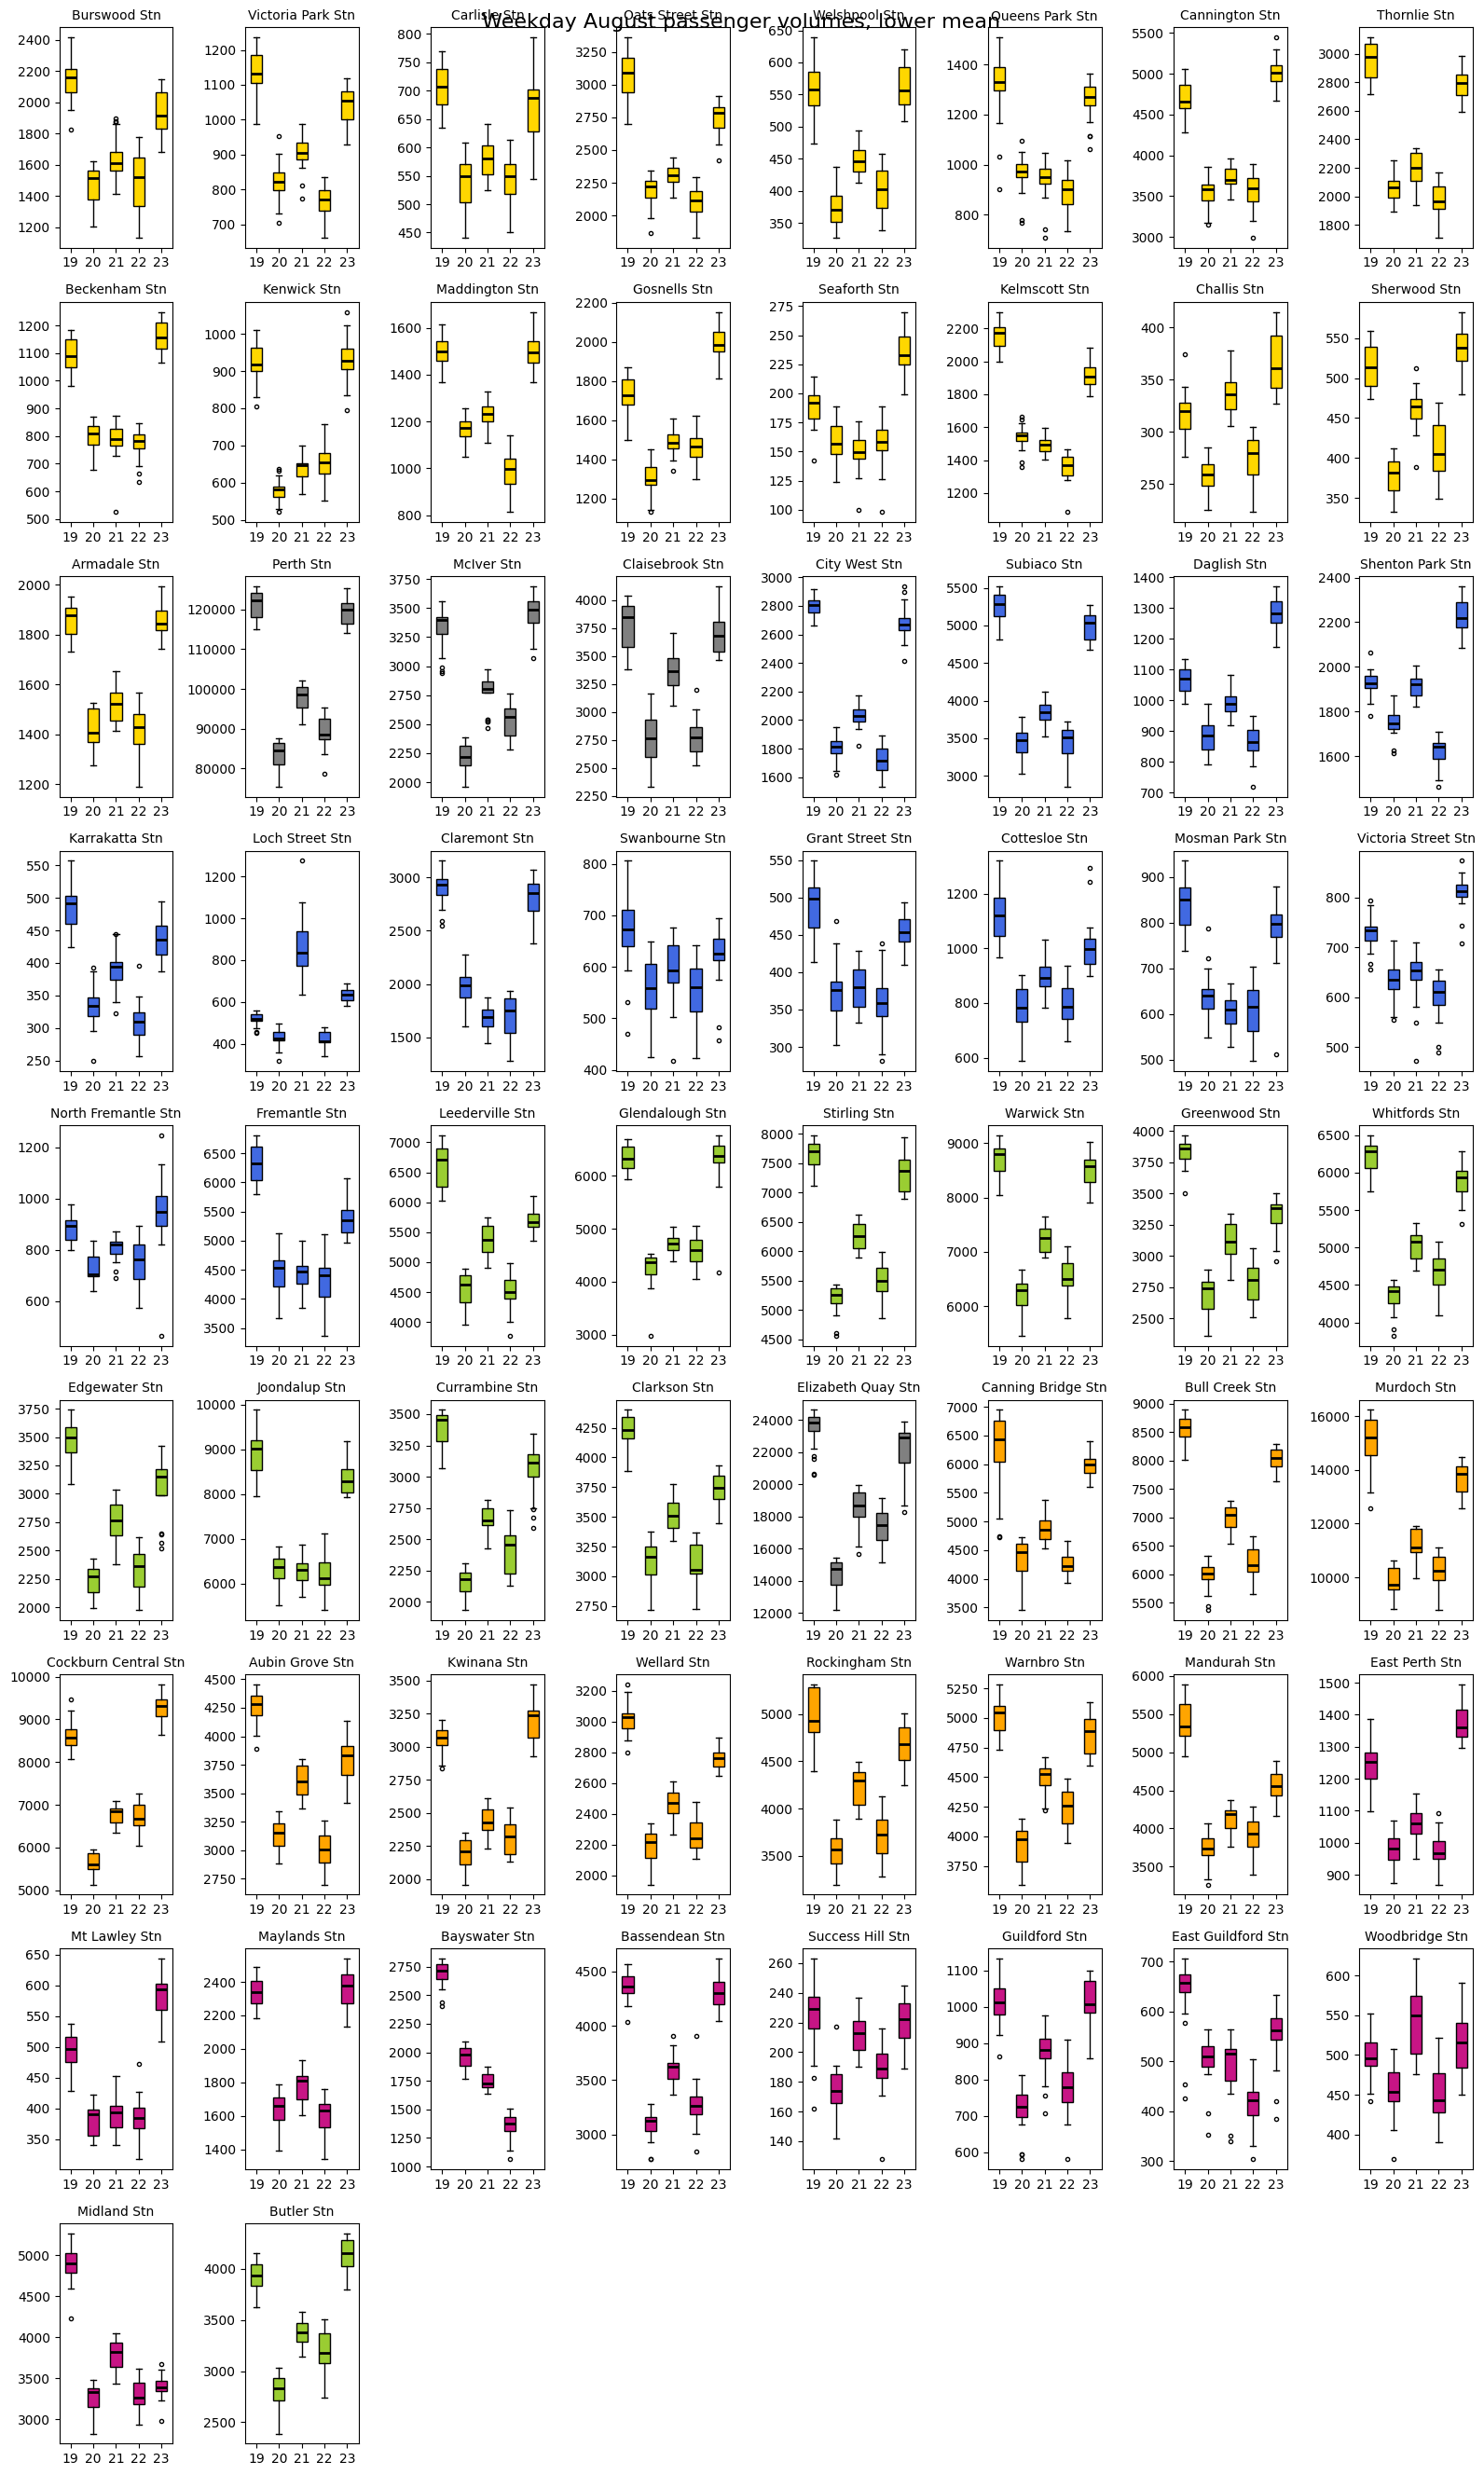

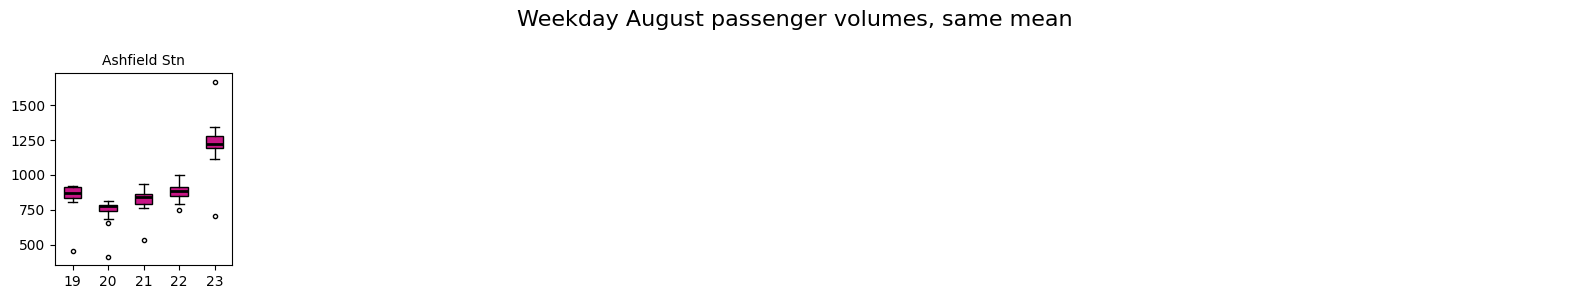

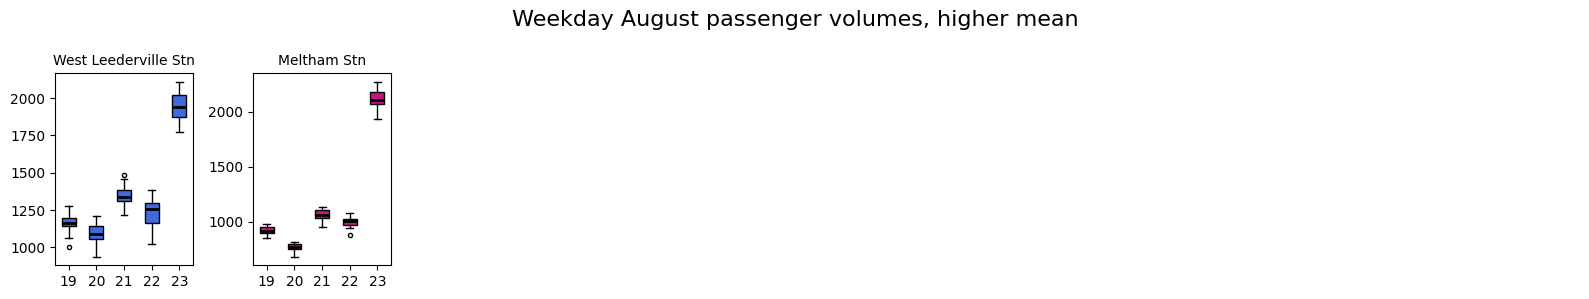

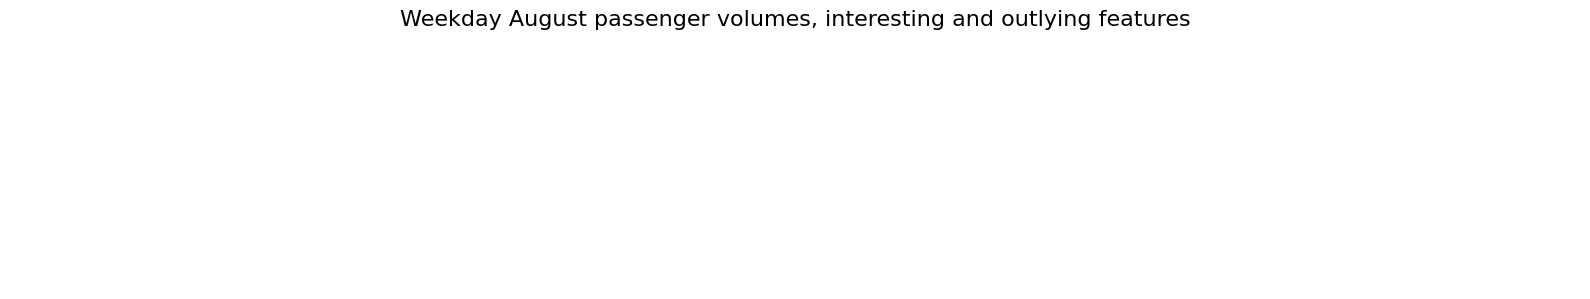

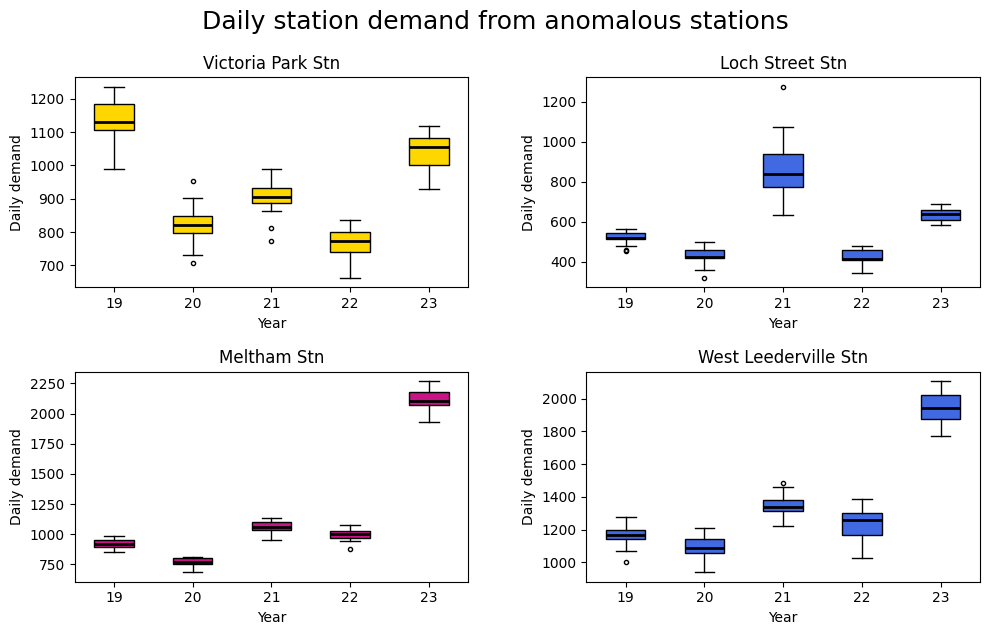

Maximum mean for year 1 was 93.59%, recorded at West Leederville Stn
Minimum mean for year 1 was 61.26%, recorded at Elizabeth Quay Stn
Average mean for year 1 was 73.51%
SD for year 1 was 7.07%
Median mean for year 1 was 71.32%, recorded at Kelmscott Stn
83.4%
72.95%
87.27%
            0
count 69.0000
mean   0.7351
std    0.0707
min    0.6126
25%    0.6913
50%    0.7132
75%    0.7722
max    0.9359


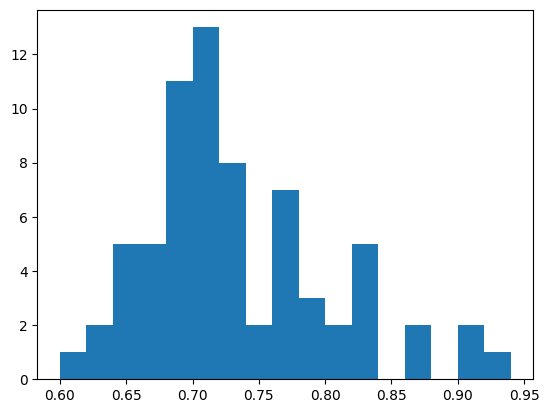


Maximum mean for year 2 was 164.17%, recorded at Loch Street Stn
Minimum mean for year 2 was 58.04%, recorded at Claremont Stn
Average mean for year 2 was 83.28%
SD for year 2 was 14.28%
Median mean for year 2 was 80.55%, recorded at Welshpool Stn
115.65%
64.97%
96.22%
            0
count 69.0000
mean   0.8328
std    0.1428
min    0.5804
25%    0.7640
50%    0.8055
75%    0.8582
max    1.6417


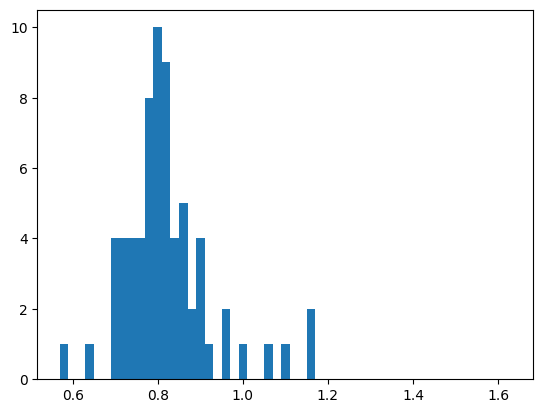


Maximum mean for year 3 was 108.32%, recorded at Meltham Stn
Minimum mean for year 3 was 50.41%, recorded at Bayswater Stn
Average mean for year 3 was 74.85%
SD for year 3 was 9.72%
Median mean for year 3 was 73.4%, recorded at Perth Stn
108.32%
50.41%
103.27%
            0
count 69.0000
mean   0.7485
std    0.0972
min    0.5041
25%    0.6846
50%    0.7340
75%    0.7873
max    1.0832


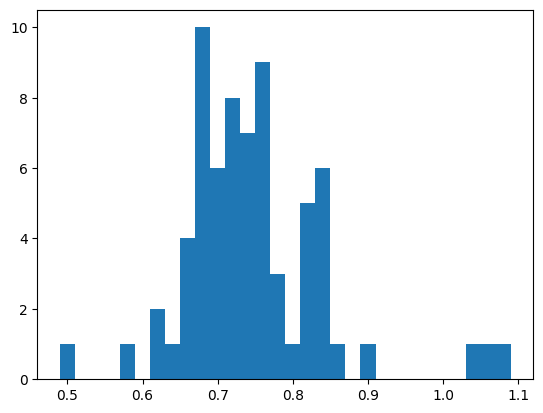


Maximum mean for year 4 was 229.57%, recorded at Meltham Stn
Minimum mean for year 4 was 0.0%, recorded at Bayswater Stn
Average mean for year 4 was 100.4%
SD for year 4 was 24.26%
Median mean for year 4 was 96.42%, recorded at Queens Park Stn
229.57%
0.0%
143.31%
            0
count 69.0000
mean   1.0040
std    0.2426
min    0.0000
25%    0.9145
50%    0.9642
75%    1.0463
max    2.2957


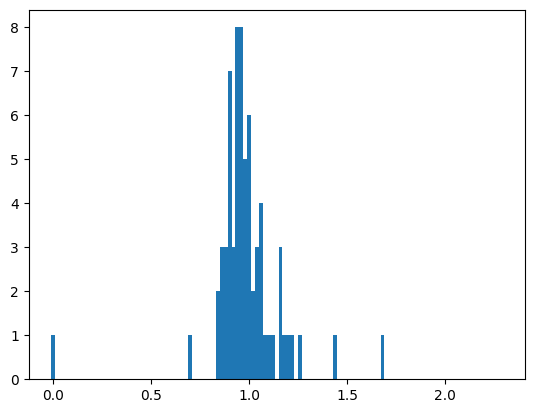


202019 outliers

202020 outliers
93.59% seen at West Leederville Stn
91.1% seen at Shenton Park Stn
91.6% seen at Woodbridge Stn

202021 outliers
58.04% seen at Claremont Stn
106.15% seen at Challis Stn
115.57% seen at West Leederville Stn
164.17% seen at Loch Street Stn
115.65% seen at Meltham Stn
109.17% seen at Woodbridge Stn

202022 outliers
50.41% seen at Bayswater Stn
106.1% seen at West Leederville Stn
108.32% seen at Meltham Stn
103.27% seen at Ashfield Stn

202023 outliers
0.0% seen at Bayswater Stn
69.29% seen at Midland Stn
125.8% seen at Seaforth Stn
167.32% seen at West Leederville Stn
229.57% seen at Meltham Stn
143.31% seen at Ashfield Stn



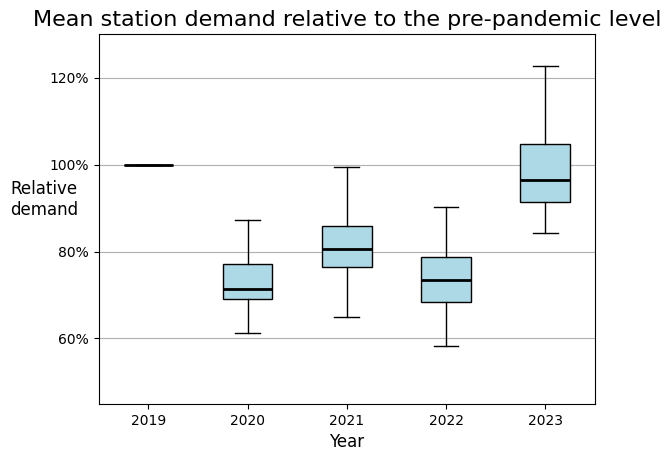

    Year 1  Year 2         Station Name       Line  Type  P-value
4     2019    2023         Armadale Stn   Armadale     4   0.8054
3     2019    2023       Maddington Stn   Armadale     1   0.7918
9     2019    2023      Glendalough Stn  Joondalup     2   0.7715
2     2019    2023          Kenwick Stn   Armadale     1   0.7713
17    2019    2023     Success Hill Stn    Midland     1   0.6623
0     2019    2023        Welshpool Stn   Armadale     1   0.6595
18    2019    2023        Guildford Stn    Midland     1   0.6305
11    2019    2023         Maylands Stn    Midland     2   0.3603
6     2019    2023      Claisebrook Stn       City     2   0.3279
19    2019    2023       Woodbridge Stn    Midland     1   0.1854
1     2019    2023      Queens Park Stn   Armadale     4   0.1672
10    2019    2023   Canning Bridge Stn   Mandurah     4   0.1654
8     2019    2023  North Fremantle Stn  Fremantle     4   0.0888
15    2019    2023       Bassendean Stn    Midland     4   0.0821
5     2019

In [17]:
def perform_ttest(data1, data2):
    tvals = []
    pvals = []
    normlist1 = []
    normlist2 = []

    for stationind in range(len(data1)):
        data1list = data1[stationind]
        data2list = data2[stationind]
        #if data1list != [] and data2list != []:
            #normlist1.append(scipy.stats.normaltest(data1list).pvalue)
            #normlist2.append(scipy.stats.normaltest(data2list).pvalue)
        tval, pval = scipy.stats.ttest_ind(data1list, data2list, equal_var=False)
        tvals.append(tval)
        pvals.append(pval)
    
    #print(statistics.mean(normlist1))
    #print(statistics.mean(normlist2))
    
    return tvals, pvals

def run_ttest(ttestsumlist, stoplocations, years, testtype):
    plist = []
    sig = 0.05
    colours=['red', 'green']
    for testind in range(len(ttestsumlist)-1):
        if testtype == 'compare':
            tvals, pvals = perform_ttest(ttestsumlist[0], ttestsumlist[testind+1])
        else:
            tvals, pvals = perform_ttest(ttestsumlist[testind], ttestsumlist[testind+1])
        pinds = []
        for val in pvals:
            if val < sig:
                pinds.append((0, val))
            else:
                pinds.append((1, val))
        plist.append(pinds)

    notsiglist = []
    for stationind in range(len(ttestsumlist[0])):
        plotlist = []
        loclist = []
        indlist = []
        collist = []
        for monthind in range(len(ttestsumlist)):
            if ttestsumlist[monthind][stationind]:
                ttestsum = statistics.mean(ttestsumlist[monthind][stationind])
            else:
                ttestsum = 0
            plotlist.append(ttestsum)
            if monthind != 0:
                loclist.append(ttestsum)
                indlist.append(monthind)
                issig = plist[monthind-1][stationind][0]
                collist.append(colours[issig])
                if issig == 1:
                    notsiglist.append((stationind, monthind, plist[monthind-1][stationind][1]))

        #pyplot.plot(plotlist, alpha=0.5)
        #pyplot.scatter(indlist, loclist, color=collist)
    #pyplot.show()

    tablelist = []
    for ind in range(len(notsiglist)):
        if testtype == 'compare':
            tablelist.append([years[0], years[notsiglist[ind][1]], stoplocations['StationName'][notsiglist[ind][0]], linelist[contextlist[notsiglist[ind][0]][0]].split()[0], contextlist[notsiglist[ind][0]][1], notsiglist[ind][2]])
        else:
            tablelist.append([years[notsiglist[ind][1]-1], years[notsiglist[ind][1]], stoplocations['StationName'][notsiglist[ind][0]], linelist[contextlist[notsiglist[ind][0]][0]].split()[0], contextlist[notsiglist[ind][0]][1], notsiglist[ind][2]])

    tabledf = pandas.DataFrame(tablelist, columns=['Year 1', 'Year 2', 'Station Name', 'Line', 'Type', 'P-value']).sort_values(by=['Year 2', 'P-value'], ascending=False)
    print(tabledf.to_string())
    return tabledf

def percent_string(number, sigfig):
    if sigfig == 0:
        return str(int(round(number*100, 0))) + "%"
    else:
        return str(round(number*100, sigfig)) + "%"

def mean_table(meanlist, stoplocations, othertabledf, years):
    limits = [-100000, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 100000]

    limitlabels = []
    for limind in range(len(limits)-1):
        if limits[limind] == -100000:
            label = "less than " + percent_string(limits[limind+1], 0)
        elif limits[limind+1] == 100000:
            label = "more than " + percent_string(limits[limind], 0)
        else:
            label = percent_string(limits[limind], 0) + " to " + percent_string(limits[limind+1], 0)
        limitlabels.append(label)
    
    ttestindexlist = [[], [], [], []]
    for index, row in othertabledf.iterrows():
        stationind, yearind = ttest_index_extractor(stoplocations, row, years)
        if stationind != -1:
            ttestindexlist[yearind].append(stationind)

    difflist = []
    for monthind in range(len(meanlist)):
        if monthind != 0:
            diffsublist = []
            for stationind in range(len(meanlist[monthind])):
                if stationind not in ttestindexlist[monthind-1]:
                    refmonth = meanlist[monthind-1][stationind]
                    actmonth = meanlist[monthind][stationind]
                    if refmonth != 0 and actmonth != 0:
                        diff = actmonth/refmonth
                        diffsublist.append(diff)
            difflist.append(diffsublist)

    countlist = []
    for diffind in range(len(difflist)):
        counts, bins = numpy.histogram(difflist[diffind], bins=limits)
        tablerow = [str(years[diffind]) + " - " + str(years[diffind+1])] + counts.tolist()
        countlist.append(tablerow)
    print(tabulate.tabulate(countlist, headers=limitlabels))

def get_line_avg(monthlist):
    groupsum = numpy.zeros(len(linelist))
    groupcounts = numpy.zeros(len(linelist))
    for stationind in range(len(monthlist)):
        stationgroup = contextlist[stationind][0]
        groupsum[stationgroup] += monthlist[stationind]
        groupcounts[stationgroup] += 1
    groupmean = groupsum/groupcounts
    return groupmean

def sublist_maker(ttestsumlist, indexlist):
    sumlist = []
    for monthind in range(len(ttestsumlist)):
        monthlist = []
        for stationind in range(len(ttestsumlist[monthind])):
            if stationind in indexlist:
                monthlist.append(ttestsumlist[monthind][stationind])
        sumlist.append(monthlist)
    return sumlist

def box_plot_loop(sublist, indlist, stoplocations, title):
    length = len(sublist[0])
    rows = math.floor((length/8)+0.99)
    if rows == 0:
        rows = 1
    fig, axes = pyplot.subplots(nrows=rows, ncols=8, figsize=(16, rows*3))
    axes = axes.flatten()
    for boxind in range(rows*8):
        if boxind < len(sublist[0]):
            colind = contextlist[indlist[boxind]][0]
            stationlist = [sublist[0][boxind], sublist[1][boxind], sublist[2][boxind], sublist[3][boxind], sublist[4][boxind]]
            axes[boxind].boxplot(stationlist, vert=True, sym='.', labels=[19, 20, 21, 22, 23], patch_artist = True, boxprops = dict(facecolor = collist[colind]), medianprops = dict(color = "black", linewidth = 2))
            axes[boxind].set_title(stoplocations['StationName'].iloc[indlist[boxind]], fontsize=10)
        else:
            axes[boxind].axis('off')
    fig.suptitle(title, fontsize=16)
    pyplot.tight_layout()
    pyplot.show()

def ttest_index_extractor(stoplocations, row, years):
    stationind = -1
    yearind = -1
    if len(years) == 2:
        if row['Year 1'] == years[0] and row['Year 2'] == years[1]:
            if ~numpy.isnan(row['P-value']):
                stationind = stoplocations[stoplocations['StationName'] == row['Station Name']].index[0]
    else:
        for yind in range(len(years)-1):
            if row['Year 1'] == years[yind] and row['Year 2'] == years[yind+1]:
                if ~numpy.isnan(row['P-value']):
                    stationind = stoplocations[stoplocations['StationName'] == row['Station Name']].index[0]
                    yearind = yind
                
    return stationind, yearind

def triple_box_plot(sumlists, stoplocations):
    length = len(sumlists[0][0])
    subtitles = ['total passengers', 'generated commuters', 'attracted commuters']
    perplot = 6
    for startind in range(0, length, perplot):
        numplots = min(perplot, length-startind)
        fig, axes = pyplot.subplots(nrows=numplots, ncols=3, figsize=(10, numplots*3))
        axes = axes.flatten()
        for plotind in range(numplots):
            stationind = plotind+startind
            colind = contextlist[stationind][0]
            for sumtypeind in range(3):
                axesind = (plotind*3) + sumtypeind
                boxlist = [sumlists[sumtypeind][0][stationind], sumlists[sumtypeind][1][stationind], sumlists[sumtypeind][2][stationind], sumlists[sumtypeind][3][stationind], sumlists[sumtypeind][4][stationind]]
                axes[axesind].boxplot(boxlist, vert=True, sym='.', labels=[2019, 2020, 2021, 2022, 2023], patch_artist = True, boxprops = dict(facecolor = collist[colind]), medianprops = dict(color = "black", linewidth = 2))
                axes[axesind].set_title(stoplocations['StationName'].iloc[stationind] + ' ' + subtitles[sumtypeind], fontsize=11)
                axes[axesind].set_ylabel("Daily demand", fontsize=10.5)
                axes[axesind].set_xlabel("Year", fontsize=10.5)
        pyplot.tight_layout()
        pyplot.show()

def make_box_plot(ttestsumlist, stoplocations, tabledf, years, twoyears, profiletype):
    indrangelist = list(range(len(ttestsumlist[0])))
    if twoyears[1] == 2023:
        speciallist = [60]
    else:
        speciallist = []
    titleprefix = ''
    if profiletype == 'home':
        titleprefix = ''
    elif profiletype == 'work':
        titleprefix = ''

    ttestindexlist = []
    for index, row in tabledf.iterrows():
        ind, yearind = ttest_index_extractor(stoplocations, row, twoyears)
        if ind != -1:
            ttestindexlist.append(ind)
    ttestindexlist = sorted(ttestindexlist)

    miscindexlist = []
    for value in indrangelist:
        if value not in (ttestindexlist + speciallist):
            miscindexlist.append(value)
    highindlist = []
    lowindlist = []
    for ind in miscindexlist:
        yearind1 = years.index(twoyears[0])
        yearind2 = years.index(twoyears[1])
        refmean = statistics.mean(ttestsumlist[yearind1][ind])
        mean = statistics.mean(ttestsumlist[yearind2][ind])
        if mean < refmean:
            lowindlist.append(ind)
        else:
            highindlist.append(ind)

    titles = ["Weekday August passenger volumes, lower mean",
              "Weekday August passenger volumes, same mean",
              "Weekday August passenger volumes, higher mean",
              "Weekday August passenger volumes, interesting and outlying features"]
    indexlist = [
    lowindlist, # low  sig t-test values
    ttestindexlist, # non-sig t-test values
    highindlist, # high  sig t-test values
    speciallist # list of special values
    ]

    for ind in range(len(indexlist)):
        sublist = sublist_maker(ttestsumlist, indexlist[ind])
        box_plot_loop(sublist, indexlist[ind], stoplocations, titles[ind])

def quadplot(sumlist, stoplocations):
    #stationlist = [17, 18, 19, 45] # city
    #stationlist = [38, 54, 39, 47] # joon mand
    stationlist = [1, 26, 59, 21] # anomalies
    #stationlist = [23, 57, 27, 55] # airport lakeland
    fig, axes = pyplot.subplots(nrows=2, ncols=2, figsize=(10, 6))
    axes = axes.flatten()
    for ind in range(len(stationlist)):
        stationind = stationlist[ind]
        colind = contextlist[stationind][0]
        boxlist = [sumlist[0][stationind], sumlist[1][stationind], sumlist[2][stationind], sumlist[3][stationind], sumlist[4][stationind]]
        axes[ind].boxplot(boxlist, vert=True, sym='.', labels=[19, 20, 21, 22, 23], patch_artist = True, boxprops = dict(facecolor = collist[colind]), medianprops = dict(color = "black", linewidth = 2))
        axes[ind].set_title(stoplocations['StationName'].iloc[stationind], fontsize=12)
        axes[ind].set_ylabel("Daily demand")
        axes[ind].set_xlabel("Year")
    pyplot.tight_layout()
    pyplot.subplots_adjust(hspace=0.4, wspace=0.3)
    #fig.suptitle("Daily station demand for Joondalup and Mandurah line stations", fontsize=18, y=1.05)
    #fig.suptitle("Daily station demand for city stations", fontsize=18, y=1.05)
    fig.suptitle("Daily station demand from anomalous stations", fontsize=18, y=1.05)
    #fig.suptitle("Daily station demand for stations affected by new network additions", fontsize=18, y=1.05)
    pyplot.show()

def create_tuple(meanlist, testtype):
    tuplelist = []
    for ind in range(len(meanlist[0])):
        if testtype == 'compare':
            mod = meanlist[0][ind]
            tup = (meanlist[0][ind]/mod, meanlist[1][ind]/mod, meanlist[2][ind]/mod, meanlist[3][ind]/mod, meanlist[4][ind]/mod)
        else:
            tup = (meanlist[0][ind], meanlist[1][ind]/meanlist[0][ind], meanlist[2][ind]/meanlist[1][ind], meanlist[3][ind]/meanlist[2][ind], meanlist[4][ind]/meanlist[3][ind])
        tuplelist.append(tup)
    tuplearray = numpy.array(tuplelist)
    return tuplearray

def mean_stats(meanlist, stoplocations, testtype):
    tuplearray = create_tuple(meanlist, testtype)
    meanyearlist = [1]
    for yearind in range(len(tuplearray[0])):
        if yearind != 0:
            yearlist = []
            for stationind in range(len(tuplearray)):
                yearlist.append(tuplearray[stationind][yearind])
            #if 0 in yearlist:
                #yearlist.remove(0)
            meanyearlist.append(yearlist)
            meanmaxind = yearlist.index(max(yearlist))
            meanavg = statistics.mean(yearlist)
            meansd = statistics.stdev(yearlist)
            meanminind = yearlist.index(min(yearlist))
            meanmedianind = yearlist.index(min(yearlist, key=lambda x:abs(x-statistics.median(yearlist))))

            print("Maximum mean for year " + str(yearind) + " was " + percent_string(yearlist[meanmaxind], 2) + ", recorded at " + str(stoplocations['StationName'].iloc[meanmaxind]))
            print("Minimum mean for year " + str(yearind) + " was " + percent_string(yearlist[meanminind], 2) + ", recorded at " + str(stoplocations['StationName'].iloc[meanminind]))
            print("Average mean for year " + str(yearind) + " was " + percent_string(meanavg, 2))
            print("SD for year " + str(yearind) + " was " + percent_string(meansd, 2))
            print("Median mean for year " + str(yearind) + " was " + percent_string(yearlist[meanmedianind], 2) + ", recorded at " + str(stoplocations['StationName'].iloc[meanmedianind]))
            print(percent_string(yearlist[59], 2)) # Meltham
            print(percent_string(yearlist[60], 2)) # Bayswater
            print(percent_string(yearlist[61], 2)) # Ashfield


            print(pandas.DataFrame(yearlist).describe())
            minval = round(min(yearlist)-0.01, 2)
            maxval = round(max(yearlist)+0.01, 2)
            binarray = numpy.arange(minval, maxval, 0.02)
            pyplot.hist(yearlist, bins=binarray)
            pyplot.show()
            print()

            #if yearind == 4:
                #for station in yearlist:
                    #print(station)

    labels = [2019, 2020, 2021, 2022, 2023]
    boxplotdict = pyplot.boxplot(meanyearlist, vert=True, sym='.', labels=labels, patch_artist = True, medianprops = dict(color = "black", linewidth = 2))  
    pyplot.clf()

    for yearind in range(len(labels)):
        print("20" + str(labels[yearind]) + " outliers")
        for flyer in boxplotdict['fliers'][yearind].get_ydata():
            # str(stoplocations['StationName'].iloc[meanyearlist.index(flyer)])
            print(percent_string(flyer, 2) + " seen at " + str(stoplocations['StationName'].iloc[meanyearlist[yearind].index(flyer)]))
        print()

    boxplotdict = pyplot.boxplot(meanyearlist, vert=True, sym='', labels=labels, patch_artist = True, medianprops = dict(color = "black", linewidth = 2), boxprops = dict(facecolor="lightblue"))
    pyplot.title("Mean station demand relative to the pre-pandemic level", fontsize=16)
    pyplot.yticks(numpy.arange(0, 2, 0.2), ["0", "20%", "40%", "60%", "80%", "100%", "120%", "140%", "160%", "180%"], fontsize=10)
    pyplot.xticks(fontsize=10)
    pyplot.ylabel("Relative\ndemand", fontsize=12, rotation=0)
    pyplot.xlabel("Year", fontsize=12)
    pyplot.ylim(0.45, 1.3)
    pyplot.grid(axis = 'y')
    pyplot.show()
    

def cluster_tuples(meanlist, stoplocations):
    tuplearray = create_tuple(meanlist)
    
    clusters = 3
    kmeans = sklearn.cluster.KMeans(n_clusters=clusters, init='k-means++', n_init=1, random_state=None)
    kmeans.fit(tuplearray)

    labels = kmeans.labels_
    print(labels)
    for labelind in range(clusters):
        indlist = numpy.where(labels == labelind)[0].tolist()
        namelist = []
        for ind in indlist:
            namelist.append(stoplocations['StationName'].iloc[ind])
        print(namelist)

    pca = sklearn.decomposition.PCA(n_components=2)
    pca_reduced = pca.fit_transform(tuplearray)

    pyplot.figure(figsize=(10, 8))
    for cluster in numpy.unique(labels):
        pyplot.scatter(pca_reduced[labels == cluster, 0], pca_reduced[labels == cluster, 1], label=f'Cluster {cluster}')

    centers_reduced = pca.transform(kmeans.cluster_centers_)
    pyplot.scatter(centers_reduced[:, 0], centers_reduced[:, 1], s=300, c='red', label='Centers', marker='X')

    pyplot.title('K-Means Clustering Results')
    pyplot.xlabel('Principal Component 1')
    pyplot.ylabel('Principal Component 2')
    pyplot.legend()
    pyplot.show()

def profile_analysis(demandprofiles, problemdays, stoplocations):
    years = [2019, 2020, 2021, 2022, 2023]
    sumlist = profile_sums(demandprofiles, problemdays, forttest=False, profiletype='all')
    meanlist = profile_means(sumlist)

    allttestsumlist = profile_sums(demandprofiles, problemdays, forttest=True, profiletype='all')
    comparetabledf = run_ttest(allttestsumlist, stoplocations, years, testtype='compare') # compare or other
    make_box_plot(allttestsumlist, stoplocations, comparetabledf, years, [2019, 2022], profiletype='all')

    homettestsumlist = profile_sums(demandprofiles, problemdays, forttest=True, profiletype='home')
    #homecomparetabledf = run_ttest(homettestsumlist, stoplocations, years, testtype='compare') # compare or other
    #make_box_plot(homettestsumlist, stoplocations, homecomparetabledf, years, [2019, 2023], profiletype='all')

    workttestsumlist = profile_sums(demandprofiles, problemdays, forttest=True, profiletype='work')
    #workcomparetabledf = run_ttest(workttestsumlist, stoplocations, years, testtype='compare') # compare or other
    #make_box_plot(workttestsumlist, stoplocations, workcomparetabledf, years, [2019, 2023], profiletype='all')

    #triple_box_plot([allttestsumlist, homettestsumlist, workttestsumlist], stoplocations)
    quadplot(allttestsumlist, stoplocations)

    #cluster_tuples(meanlist, stoplocations)
    mean_stats(meanlist, stoplocations, testtype='compare') # compare or other

    othertabledf = run_ttest(allttestsumlist, stoplocations, years, testtype='compare') # compare or other
    mean_table(meanlist, stoplocations, othertabledf, years)

try:
    profile_analysis(demandprofiles, problemdays, stoplocations)
except NameError:
    print("Run full")

In [9]:
def get_stop_latlong(stoplocations, locations):
    xvals = []
    yvals = []
    for location in locations:
        stoploc = stoplocations[stoplocations['StationID'] == location]
        xvals.append(stoploc['X'])
        yvals.append(stoploc['Y'])
    return xvals, yvals

def plot_map(stoplocations, locations):
    bounds = (-31.5, -32.6, 116.2, 115.5) # N S E W
    watertol = 0.0001

    tags = {
        'natural': ['coastline', 'water'],
        'boundary': 'administrative',
        'name': ['Fremantle Line', 'Midland Line', 'Forrestfield-Airport Link', 'Armadale Line', 'Thornlie Line', 'Mandurah Line', 'Joondalup Line']
        }
    
    gdf = osmnx.features_from_bbox(bbox=bounds, tags=tags)

    fig, ax = pyplot.subplots(figsize=(24, 24))
    ax.set_facecolor('lightblue')
    gdf[(gdf['boundary'] == 'administrative') & (gdf['admin_level'] == '9')].plot(ax=ax, facecolor='white', edgecolor='none', alpha=1)
    gdf[(gdf['boundary'] == 'administrative') & (gdf['admin_level'] == '9')].plot(ax=ax, facecolor='none', edgecolor='black', alpha=0.025)

    gdf[(gdf['natural'] == 'coastline')].plot(ax=ax, facecolor='none', edgecolor='grey', alpha=0.6)
    gdf[(gdf['natural'] == 'water') & (gdf['geometry'].area >= watertol)].plot(ax=ax, facecolor='lightblue', edgecolor='none', alpha=1)
    gdf[(gdf['natural'] == 'water') & (gdf['geometry'].area >= watertol)].plot(ax=ax, facecolor='none', edgecolor='grey', alpha=0.4)

    gdf[(gdf['name'] == 'Fremantle Line')].plot(ax=ax, facecolor='none', edgecolor='blue', alpha=0.5)
    gdf[(gdf['name'] == 'Midland Line')].plot(ax=ax, facecolor='none', edgecolor='purple', alpha=0.5)
    gdf[(gdf['name'] == 'Forrestfield-Airport Link')].plot(ax=ax, facecolor='none', edgecolor='turquoise', alpha=0.5)
    gdf[(gdf['name'] == 'Armadale Line')].plot(ax=ax, facecolor='none', edgecolor='yellow', alpha=0.5)
    gdf[(gdf['name'] == 'Thornlie Line')].plot(ax=ax, facecolor='none', edgecolor='yellow', alpha=0.5)
    gdf[(gdf['name'] == 'Joondalup Line')].plot(ax=ax, facecolor='none', edgecolor='lightgreen', alpha=0.5)
    gdf[(gdf['name'] == 'Mandurah Line')].plot(ax=ax, facecolor='none', edgecolor='orange', alpha=0.5)

    xvals, yvals = get_stop_latlong(stoplocations, locations)
    pyplot.scatter(xvals, yvals, s=10, color='black', zorder=100)

    pyplot.title('Map of Transperth Rail network')
    pyplot.xlim(bounds[3], bounds[2])
    pyplot.ylim(bounds[1], bounds[0])

    pyplot.show()

In [10]:
def get_allstops(datadir, trainfilename, removecitystations):
    stoplocations = read_stations_in(datadir+trainfilename)
    lineind = [l[0] for l in contextlist]
    stationtype = [l[1] for l in contextlist]
    stoplocations.insert(4, "Line Index", lineind)
    stoplocations.insert(5, "Station Type", stationtype)
    allstops = numpy.array(stoplocations['StationID'].tolist())
    if removecitystations:
        citystations = [2776] #[2776, 2777, 2778]
        cityinds = stoplocations.index[stoplocations['StationID'].isin(citystations)].tolist()
        stoplocations = stoplocations.drop(cityinds)
        allstops = numpy.delete(allstops, cityinds)
    return allstops, stoplocations

def run_profile_maker(datadir, filenames, problemdays, allstops, stoplocations, profiletype, diagnosticlocations, diagnostics=False):

    print("Reading data in...")
    datalist = []
    for name in filenames:
        monthlydata = read_monthly_data_in(datadir+name)
        datalist.append(monthlydata)
    print("Data read successful, creating demand profiles...")

    septemberdata = read_sep2023_in(datadir, allstops)

    monthlyprofiles = [] # array of tuples for each monthly data file, tuple contains (demand profiles, month, year)
    for dataenum in enumerate(datalist):
        if profiletype == 'daily':
            profiletuple = create_daily_demand_profiles(dataenum[1], allstops, problemdays[dataenum[0]])
        else:
            profiletuple = create_weekly_demand_profiles(dataenum[1], allstops, problemdays[dataenum[0]], septemberdata)
        monthlyprofiles.append(profiletuple)
        print(calendar.month_name[dataenum[1][1]] + ' ' + str(dataenum[1][2]) + ' profiles created...')
    print("All demand profiles created!")

    if diagnostics:
        print("Plotting demand profiles...")
        for profiletuple in monthlyprofiles: # each monthly tuple
            demandprofiles = profiletuple[0]
            for onoffprofiles in demandprofiles: # boardings or alighting profiles
                loclen = len(allstops)
                for i in range(loclen):
                    if allstops[i] in diagnosticlocations:
                        plot_profile(onoffprofiles[i], allstops[i], stoplocations, 'demand', profiletuple[1], profiletuple[2])
        print("Demand profiles plotted!")

    if diagnostics:
        print("Plotting arrays for diagnostics...")
        for monthlydata in datalist:
            vizualise_months(monthlydata, diagnosticlocations, stoplocations)
        print("Plotted arrays!")

    if diagnostics:
        print("Creating and plotting GIS map")
        plot_map(stoplocations, allstops)

    return monthlyprofiles


def profile_list_diagnostics(demandprofiles, nullprofiles, allstops, stoplocations):
    print("Printing profile days for diagnostics...")
    for profile in nullprofiles:
        monthind = profile[0]
        stationind = profile[1]
        dayind = profile[2]
        boardingsum = profile[3]
        alightingsum = profile[4]

        stationid = allstops[stationind]
        stationname = stoplocations[stoplocations['StationID'] == stationid]['StationName'].iloc[0]
        print("In month " + str(monthind) + ", " + str(stationname) + " ("+ str(stationind) + ") on day " + str(dayind+1) + " (" + str(dayind) + ") with a count of " + str(boardingsum) + " and " + str(alightingsum))

        #plot_profile(demandprofiles[monthind][0][0][stationind][dayind], stationid, stoplocations, 'daily', demandprofiles[monthind][1], demandprofiles[monthind][2])

    print("End of profile days")

def daily_profile_list(demandprofiles, problemdays, dailytype):
    profilelist = []
    infolist = []
    nullprofilecount = 0
    nullprofiles = []

    profilesums = profile_sums(demandprofiles, problemdays, forttest=True, profiletype='all')

    for monthind in range(len(demandprofiles)): # each monthly tuple
        demandprofile = demandprofiles[monthind][0] # demand profile of shape (2,69,31,24)

        month = demandprofiles[monthind][1]
        year = demandprofiles[monthind][2]
        weekendlist = calc_weekends(month, year)

        tol = 2.5
        multiprofilenum = 3
        boardinglist = []
        alightinglist = []
        infosublist = []

        for stationind in range(demandprofile.shape[1]):
            if dailytype == 'multi':
                boardinglistofdays = []
                alightinglistofdays = []
            if profilesums[monthind][stationind] != []:
                stationmean = statistics.mean(profilesums[monthind][stationind])
                stationstd = statistics.stdev(profilesums[monthind][stationind])
                for dayind in range(demandprofile.shape[2]):
                    if (dayind+1) not in problemdays[monthind]:
                        if (dayind+1) not in weekendlist:
                            boardingprofile = pandas.Series(demandprofile[0][stationind][dayind])
                            alightingprofile = pandas.Series(demandprofile[1][stationind][dayind])
                            bsum = numpy.sum(boardingprofile)
                            asum = numpy.sum(alightingprofile)
                            if bsum >= 20 and asum >= 20 and abs((asum+bsum) - stationmean) < (stationstd * tol):
                                if dailytype == 'multi':
                                    boardinglistofdays.append(boardingprofile)
                                    alightinglistofdays.append(alightingprofile)
                                else:
                                    boardinglist.append(boardingprofile)
                                    alightinglist.append(alightingprofile)
                                    infosublist.append([stationind, dayind])
                            else:
                                nullprofilecount += 1
                                nullprofiles.append([monthind, stationind, dayind, numpy.sum(boardingprofile), numpy.sum(alightingprofile)])

            if dailytype == 'multi' and len(boardinglistofdays) >= multiprofilenum:
                multinum = 0
                while len(boardinglistofdays) >= multiprofilenum:
                    shuffledboardings = pandas.Series()
                    shuffledalightings = pandas.Series()
                    for i in range(multiprofilenum):
                        randomind = numpy.random.randint(len(boardinglistofdays))
                        boarding = pandas.Series(boardinglistofdays.pop(randomind))
                        alighting = pandas.Series(alightinglistofdays.pop(randomind))
                        shuffledboardings = pandas.concat([shuffledboardings, boarding], ignore_index=True)
                        shuffledalightings = pandas.concat([shuffledalightings, alighting], ignore_index=True)
                    boardinglist.append(shuffledboardings)
                    alightinglist.append(shuffledalightings)
                    infosublist.append([stationind, multinum])
                    multinum += 1

        profilelist.append([boardinglist, alightinglist])
        infolist.append(infosublist)
    return profilelist, infolist, nullprofilecount, nullprofiles

def weekly_profile_list(demandprofiles, weeklytype):
    profilelist = []
    infolist = []
    nullprofilecount = 0
    nullprofiles = []

    for monthind in range(len(demandprofiles)): # each monthly tuple
        demandprofile = demandprofiles[monthind][0] # demand profile of shape (2,69,4,120)

        boardinglist = []
        alightinglist = []
        infosublist = []

        for stationind in range(demandprofile.shape[1]):
            if weeklytype == 'shuffle':
                boardinglistofdays = []
                alightinglistofdays = []
            for weekind in range(demandprofile.shape[2]):
                boardingprofile = pandas.Series(demandprofile[0][stationind][weekind])
                alightingprofile = pandas.Series(demandprofile[1][stationind][weekind])
                boardingdays = boardingprofile.values.reshape((5, 24))
                alightingdays = alightingprofile.values.reshape((5, 24))
                isvalid = True
                for dayind in range(5):
                    bsum = numpy.sum(boardingdays[dayind])
                    asum = numpy.sum(alightingdays[dayind])
                    if bsum >= 20 and asum >= 20:
                        continue
                    else:
                        isvalid = False
                        break

                if isvalid == True:
                    if weeklytype == 'shuffle':
                        for dayind in range(len(boardingdays)):
                            boardinglistofdays.append(boardingdays[dayind])
                            alightinglistofdays.append(alightingdays[dayind])
                    else:
                        boardinglist.append(boardingprofile)
                        alightinglist.append(alightingprofile)
                        infosublist.append([stationind, weekind])
                else:
                    print("Null profile detected")
                    nullprofilecount += 1
                    nullprofiles.append([monthind, stationind, weekind, numpy.sum(boardingprofile), numpy.sum(alightingprofile)])

            if weeklytype == 'shuffle':
                shufflenum = 0
                while boardinglistofdays != []:
                    shuffledboardings = pandas.Series()
                    shuffledalightings = pandas.Series()
                    for i in range(5):
                        randomind = numpy.random.randint(len(boardinglistofdays))
                        boarding = pandas.Series(boardinglistofdays.pop(randomind))
                        alighting = pandas.Series(alightinglistofdays.pop(randomind))
                        shuffledboardings = pandas.concat([shuffledboardings, boarding], ignore_index=True)
                        shuffledalightings = pandas.concat([shuffledalightings, alighting], ignore_index=True)
                    boardinglist.append(shuffledboardings)
                    alightinglist.append(shuffledalightings)
                    infosublist.append([stationind, shufflenum])
                    shufflenum += 1

        profilelist.append([boardinglist, alightinglist])
        infolist.append(infosublist)
    return profilelist, infolist, nullprofilecount, nullprofiles

def create_profile_list(demandprofiles, problemdays, allstops, stoplocations, profiletype, diagnostics):
    print("")
    print("Creating profile list...")
    weeklytype = 'normal'
    dailytype = 'normal'
    if profiletype == 'weeklyshuffled':
        weeklytype = 'shuffle'
    elif profiletype == 'dailymulti':
        dailytype = 'multi'

    if profiletype == 'daily' or profiletype == 'dailymulti':
        profilelist, infolist, nullprofilecount, nullprofiles = daily_profile_list(demandprofiles, problemdays, dailytype)
    else:
        profilelist, infolist, nullprofilecount, nullprofiles = weekly_profile_list(demandprofiles, weeklytype)

    print("Profile list created from " + str(len(profilelist)) + " months, " + str(nullprofilecount) + " station days not included")

    if diagnostics:
        profile_list_diagnostics(demandprofiles, nullprofiles, allstops, stoplocations)

    return profilelist, infolist


In [11]:
def znorm_standardise(profile):
    profilemean = profile.mean()
    profilestd = profile.std()
    return (profile - profilemean) / profilestd

def znormzero_standardise(profile):
    profilestd = profile.std()
    return profile / profilestd

def singlestd_standardise(profile, maxstd):
    return profile / maxstd

def singleiqr_standardise(profile, maxiqr):
    return profile / maxiqr

def sum1000_standardise(profile, maxsum):
    profilemodifier = 1000 / maxsum
    return profile * profilemodifier

def sum10002_standardise(profile, totsum):
    profilemodifier = 1000 / totsum
    return profile * profilemodifier

def minmax_standardise(profile):
    profilemax = profile.max()
    return profile / profilemax

def get_best_model(f1list):
    bestscore = 0
    bestscoreind = 0

    for i in range(len(f1list)):
        f1score = f1list[i]
        if f1score > bestscore:
            bestscore = f1score
            bestscoreind = i

    return bestscoreind

def get_misclass_counts(misclassifedmask, y_test):
    uniquelabels = numpy.sort(numpy.unique(numpy.array(y_test)))
    misclasses = y_test[misclassifedmask[0]]
    mis0 = len(misclasses[misclasses == uniquelabels[0]])
    mis1 = len(misclasses[misclasses == uniquelabels[1]])
    totalmis = len(misclasses)
    return mis0, mis1, totalmis

def plot_classes(X_test, y_test):
    elemfreq = 5
    ptypes = ['A', 'B']
    colours = ['blue', 'orange']
    uniquelabels = numpy.sort(numpy.unique(numpy.array(y_test)))
    X_test = X_test[::elemfreq].reset_index(drop=True)
    y_test = y_test[::elemfreq]
    for i in range(len(ptypes)):
        for rowind in range(len(X_test[ptypes[i]])):
            profile = numpy.array(X_test[ptypes[i]][rowind])
            labelind = uniquelabels.tolist().index(y_test[rowind])
            pyplot.plot(profile, linestyle='-', color=colours[labelind], alpha=0.2)

        pyplot.title("Plot of demand profiles by class (type " + str(ptypes[i]) + ")")
        pyplot.xlabel('Hour')
        pyplot.ylabel('Standardised counts')
        pyplot.grid(True)

        pyplot.show()

def class_factor_counter(misclassdf, corclassdf, stoplocations):
    relativelist = []
    for col in misclassdf.columns:
        misclasscounts = misclassdf[col].value_counts().sort_index()
        bothdf = pandas.concat([misclassdf[col], corclassdf[col]])
        totalcounts = bothdf.value_counts().sort_index()

        indices = misclasscounts.index.union(totalcounts.index)
        misclasscounts = misclasscounts.reindex(indices, fill_value=0)

        if len(misclasscounts) != len(totalcounts):
            print("PROBLEM in class_factor_counter()")
        multiplier = len(bothdf) / len(misclassdf)
        expectedcounts = totalcounts.div(multiplier)
        relativepercent = misclasscounts.div(expectedcounts).mul(100)
        if col == 'Station Name':
            misclasscounts = misclasscounts.reindex(stoplocations['StationName'])
            expectedcounts = expectedcounts.reindex(stoplocations['StationName'])
            totalcounts = totalcounts.reindex(stoplocations['StationName'])
            relativepercent = relativepercent.reindex(stoplocations['StationName'])
        relativelist.append([misclasscounts, expectedcounts, totalcounts, relativepercent])
    return relativelist

def print_misclasses(missclasslist, corclasslist, stoplocations):
    print("")

    classlist = [missclasslist, corclasslist]
    infolist = []
    for typeind in range(len(classlist)):
        info = classlist[typeind]
        classinfo = []
        for rowind in range(len(info)):
            day = info[rowind][1]+1
            stationname = stoplocations['StationName'].iloc[info[rowind][0]]
            stationline = contextlist[info[rowind][0]][0]
            stationtype = contextlist[info[rowind][0]][1]
            stationzone = contextlist[info[rowind][0]][2]
            stationirsad = contextlist[info[rowind][0]][3]
            classinfo.append([day, stationname, stationline, stationtype, stationzone, stationirsad])
        infolist.append(classinfo)

    misclassdf = pandas.DataFrame(infolist[0], columns=['Day', 'Station Name', 'Line', 'Station Type', 'Station Zone', 'Area IRSAD score'])
    corclassdf = pandas.DataFrame(infolist[1], columns=['Day', 'Station Name', 'Line', 'Station Type', 'Station Zone', 'Area IRSAD score'])

    relativelist = class_factor_counter(misclassdf, corclassdf, stoplocations)
    for dflist in relativelist:
        colname = dflist[3].index.name
        colindex = dflist[3].index
        coldata = dflist[3].values
        colmis = numpy.array(dflist[0])
        colex = numpy.array(dflist[1])
        coltot = numpy.array(dflist[2])
        chi2, pval = scipy.stats.chisquare(colmis, f_exp=colex)
        print("Percent of expected " + colname + " occurances")
        print("The chi-squared test p-value is: " + str(round(pval, 4)))
        print("Percent\t\t " + colname)
        for rowind in range(len(coldata)):
            #chi2, pval = scipy.stats.chisquare(colmis[rowind], f_exp=colex[rowind])
            print(str(int(coldata[rowind])) + "%\t (" + str(round(colex[rowind], 1)) + ")\t " + str(colindex[rowind]))
        print("")
    
def plot_misclasses(misclasses, correctclasses):
    ptypes = ['A', 'B']
    for i in range(len(ptypes)):
        for row in correctclasses[ptypes[i]]:
            profile = numpy.array(row)
            pyplot.plot(profile, linestyle='-', color='green', alpha=0.1)
                
        for row in misclasses[ptypes[i]]:
            profile = numpy.array(row)
            pyplot.plot(profile, linestyle='-', color='red', alpha=0.1)

        pyplot.title("Plot of correct and incorrectly classified standardised demand profiles (type " + str(ptypes[i]) + ")")
        pyplot.xlabel('Hour')
        pyplot.ylabel('Standardised counts')
        pyplot.grid(True)

        pyplot.show()

def plot_hist(f1list):
    minval = round(min(f1list)-0.01, 2)
    maxval = round(max(f1list)+0.01, 2)
    binarray = numpy.arange(minval, maxval, 0.005)
    pyplot.hist(f1list, bins=binarray)
    pyplot.show()

def quadmultiplot(profilelist, infolist, stoplocations):
    stationlist = [4, 30, 50, 22]
    months = [[0,1],[0,1],[0,4],[0,4]]
    fig, axes = pyplot.subplots(nrows=2, ncols=2, figsize=(16, 8))
    axes = axes.flatten()
    for ind in range(len(stationlist)):
        stationind = stationlist[ind]
        stationname = stoplocations['StationName'].iloc[stationind]
        for monthind in months[ind]:
            bstdarray, astdarray = get_average_profile(profilelist, infolist, monthind, stationind, 24, std=True)
            axes[ind].plot(bstdarray, linestyle='-')
            axes[ind].plot(astdarray, linestyle='--')
        axes[ind].set_title(stationname, fontsize=12)
    pyplot.tight_layout()
    pyplot.subplots_adjust(hspace=0.2, wspace=0.1)
    fig.suptitle("Yearly mean station demand from several stations", fontsize=18, y=1.05)
    pyplot.show()


def do_misclass_analysis(stoplocations, profilelist, infolist, year):

    # weekly 1000
    percents2020 = [251, 259, 244, 35, 359, 223, 0, 71, 158, 28, 201, 107, 460, 165, 93, 410, 14, 0, 107, 35, 28, 28, 0, 0, 165, 122, 115, 223, 223, 179, 0, 410, 43, 129, 14, 7, 7, 0, 0, 28, 14, 64, 79, 0, 0, 0, 7, 0, 14, 0, 21, 0, 71, 28, 35, 86, 244, 244, 43, 86, 151, 251, 7, 7, 129, 136, 187, 7, 21]
    percents2021 = [88, 264, 182, 135, 17, 193, 35, 270, 129, 64, 123, 123, 375, 176, 140, 158, 5, 0, 70, 76, 117, 88, 0, 41, 328, 176, 328, 58, 152, 93, 246, 205, 23, 252, 41, 52, 0, 23, 0, 23, 11, 5, 0, 17, 252, 41, 46, 0, 5, 0, 46, 52, 5, 52, 58, 111, 129, 293, 5, 17, 0, 105, 23, 305, 140, 152, 41, 11, 76]
    percents2022 = [33, 199, 11, 33, 154, 66, 0, 176, 121, 66, 431, 0, 210, 165, 597, 66, 11, 0, 44, 298, 44, 11, 0, 143, 77, 287, 364, 221, 154, 66, 11, 187, 165, 309, 44, 11, 0, 33, 11, 44, 0, 221, 187, 0, 165, 0, 66, 0, 0, 55, 0, 121, 11, 77, 0, 66, 132, 287, 0, 11, 0, 165, 0, 66, 265, 11, 0, 11, 99]
    percents2023 = [180, 437, 109, 0, 328, 103, 5, 158, 65, 103, 295, 191, 339, 82, 93, 27, 0, 5, 213, 93, 21, 27, 0, 399, 98, 164, 153, 21, 295, 49, 0, 32, 54, 49, 16, 0, 0, 0, 0, 49, 0, 0, 175, 71, 16, 32, 0, 0, 0, 175, 311, 0, 5, 65, 147, 49, 300, 213, 98, 0, 0, 131, 153, 196, 279, 125, 16, 0, 16]

    allmonths = [2019, 2020, 2021, 2022, 2023]
    selectmonths = [2019, 2020, '', '', 2023]

    if year == '':
        percentmeanlist = []
        for ind in range(len(percents2020)):
            vallist = [percents2020[ind], percents2021[ind], percents2022[ind], percents2023[ind]]
            percentmeanlist.append(statistics.mean(vallist))
        pyplot.plot(sorted(percentmeanlist))
        pyplot.show()
    else:
        monthindex = allmonths.index(year)-1
        percentmeanlist = [percents2020, percents2021, percents2022, percents2023][monthindex]
        selectmonths = [item if item in [2019, year] else '' for item in allmonths]
    
    top5 = get_top_5(copy.deepcopy(percentmeanlist))
    print("Stations with the highest misclassification rates over all years:")
    for ind in top5:
        stationname = stoplocations['StationName'].iloc[ind]
        print("\t" + str(stationname) + " with " + str([percents2020[ind], percents2021[ind], percents2022[ind], percents2023[ind]]))
        multi_weekly_profile(profilelist, infolist, ind, stoplocations, selectmonths)
        #multi_daily_profile(profilelist, infolist, ind, '', 8, [2019, 2020, 2021, 2022, 2023])

    print("")
    bottom5 = get_bottom_5(copy.deepcopy(percentmeanlist))
    print("Stations with the lowest misclassification rates over all years:")
    for ind in bottom5:
        stationname = stoplocations['StationName'].iloc[ind]
        print("\t" + str(stationname) + " with " + str([percents2020[ind], percents2021[ind], percents2022[ind], percents2023[ind]]))
        multi_weekly_profile(profilelist, infolist, ind, stoplocations, selectmonths)
        #multi_daily_profile(profilelist, infolist, ind, '', 8, [2019, 2020, 2021, 2022, 2023])
    
def convert_to_matrix(array):
    indices = numpy.arange(len(array))
    return numpy.column_stack((indices, array))

def do_distance(profilelist, infolist, refyearind, actyearind):
    length = 24
    percents2020 = [104, 219, 155, 104, 93, 113, 22, 118, 120, 58, 61, 195, 251, 134, 98, 155, 48, 31, 134, 180, 32, 127, 74, 111, 189, 134, 158, 138, 141, 147, 132, 174, 91, 192, 111, 52, 81, 7, 0, 63, 22, 115, 87, 31, 86, 26, 57, 17, 29, 0, 62, 58, 43, 73, 38, 107, 134, 171, 112, 139, 99, 134, 49, 117, 117, 101, 139, 12, 149]
    percents2021 = [97, 131, 157, 105, 79, 125, 114, 135, 126, 121, 105, 108, 198, 146, 123, 174, 80, 14, 75, 142, 71, 78, 65, 125, 148, 157, 146, 99, 134, 127, 147, 153, 118, 138, 100, 77, 69, 87, 36, 70, 77, 79, 55, 35, 94, 56, 76, 29, 66, 39, 48, 78, 60, 82, 75, 133, 137, 142, 87, 120, 59, 64, 82, 138, 125, 79, 84, 60, 116]
    percents2022 = [47, 169, 95, 37, 72, 63, 83, 76, 123, 192, 217, 74, 209, 188, 223, 136, 47, 5, 78, 127, 51, 73, 49, 134, 206, 150, 214, 104, 160, 131, 160, 114, 186, 231, 86, 75, 4, 47, 97, 70, 69, 128, 72, 33, 95, 47, 157, 38, 21, 106, 33, 40, 41, 81, 62, 139, 152, 147, 55, 93, 43, 59, 55, 78, 111, 77, 60, 60, 115]
    percents2023 = [59, 285, 205, 37, 131, 121, 50, 112, 156, 179, 149, 85, 208, 82, 163, 159, 35, 26, 119, 141, 59, 42, 13, 183, 109, 142, 323, 86, 264, 107, 68, 167, 150, 106, 67, 23, 4, 48, 0, 54, 6, 24, 101, 38, 83, 13, 21, 14, 31, 57, 149, 46, 74, 51, 117, 55, 192, 156, 88, 19, 108, 128, 74, 184, 235, 140, 90, 13, 55]
    percentmeanlist = [percents2020, percents2021, percents2022, percents2023][actyearind-1]

    refarraylist = []
    for stationind in range(69):
        bstdarray, astdarray = get_average_profile(profilelist, infolist, refyearind, stationind, length, std=True)
        refarray = numpy.add(bstdarray, astdarray)
        refarraylist.append(refarray)
    
    distancelist = []
    for stationind in range(69):
        bstdarray, astdarray = get_average_profile(profilelist, infolist, actyearind, stationind, length, std=True)
        actarray = numpy.add(bstdarray, astdarray)
        distsum = 0
        for hourind in range(24):
            refval = refarraylist[stationind][hourind]
            actval = actarray[hourind]
            distsum += (refval - actval)**2
        distancelist.append(math.sqrt(distsum))
        print(math.sqrt(distsum))
        pyplot.plot(refarraylist[stationind])
        pyplot.plot(actarray)
        pyplot.show()
    
    pyplot.scatter(percentmeanlist, distancelist)
    pyplot.show()

    print(distancelist)



def do_procrustes(profilelist, infolist, refyearind, actyearind, type):

    percents2020 = [104, 219, 155, 104, 93, 113, 22, 118, 120, 58, 61, 195, 251, 134, 98, 155, 48, 31, 134, 180, 32, 127, 74, 111, 189, 134, 158, 138, 141, 147, 132, 174, 91, 192, 111, 52, 81, 7, 0, 63, 22, 115, 87, 31, 86, 26, 57, 17, 29, 0, 62, 58, 43, 73, 38, 107, 134, 171, 112, 139, 99, 134, 49, 117, 117, 101, 139, 12, 149]
    percents2021 = [97, 131, 157, 105, 79, 125, 114, 135, 126, 121, 105, 108, 198, 146, 123, 174, 80, 14, 75, 142, 71, 78, 65, 125, 148, 157, 146, 99, 134, 127, 147, 153, 118, 138, 100, 77, 69, 87, 36, 70, 77, 79, 55, 35, 94, 56, 76, 29, 66, 39, 48, 78, 60, 82, 75, 133, 137, 142, 87, 120, 59, 64, 82, 138, 125, 79, 84, 60, 116]
    percents2022 = [47, 169, 95, 37, 72, 63, 83, 76, 123, 192, 217, 74, 209, 188, 223, 136, 47, 5, 78, 127, 51, 73, 49, 134, 206, 150, 214, 104, 160, 131, 160, 114, 186, 231, 86, 75, 4, 47, 97, 70, 69, 128, 72, 33, 95, 47, 157, 38, 21, 106, 33, 40, 41, 81, 62, 139, 152, 147, 55, 93, 43, 59, 55, 78, 111, 77, 60, 60, 115]
    percents2023 = [59, 285, 205, 37, 131, 121, 50, 112, 156, 179, 149, 85, 208, 82, 163, 159, 35, 26, 119, 141, 59, 42, 13, 183, 109, 142, 323, 86, 264, 107, 68, 167, 150, 106, 67, 23, 4, 48, 0, 54, 6, 24, 101, 38, 83, 13, 21, 14, 31, 57, 149, 46, 74, 51, 117, 55, 192, 156, 88, 19, 108, 128, 74, 184, 235, 140, 90, 13, 55]
    percentmeanlist = [percents2020, percents2021, percents2022, percents2023][actyearind-1]

    if type == 'year':
        refprofile = numpy.zeros(24)
        for stationind in range(69):
            bstdarray, astdarray = get_average_profile(profilelist, infolist, refyearind, stationind, 24, std=False)
            refprofile = numpy.add(refprofile, numpy.add(bstdarray, astdarray))
        refmatrix = convert_to_matrix(refprofile)
        
        actprofile = numpy.zeros(24)
        for stationind in range(69):
            bstdarray, astdarray = get_average_profile(profilelist, infolist, actyearind, stationind, 24, std=False)
            actarray = numpy.add(bstdarray, astdarray)
            if numpy.isnan(actarray).any() == False:
                actprofile = numpy.add(actprofile, actarray)
        actmatrix = convert_to_matrix(actprofile)

        mtx1, mtx2, disparity = scipy.spatial.procrustes(refmatrix, actmatrix)
        print(math.sqrt(disparity))
        pyplot.plot(mtx1)
        pyplot.plot(mtx2)
        pyplot.show()

        pyplot.plot(refmatrix)
        pyplot.plot(actmatrix)
        pyplot.show()
    else:
        refarraylist = []
        for stationind in range(69):
            bstdarray, astdarray = get_average_profile(profilelist, infolist, refyearind, stationind, 24, std=False)
            refarray = convert_to_matrix(numpy.add(bstdarray, astdarray))
            refarraylist.append(refarray)
        
        disparitylist = []
        for stationind in range(69):
            bstdarray, astdarray = get_average_profile(profilelist, infolist, actyearind, stationind, 24, std=False)
            actarray = convert_to_matrix(numpy.add(bstdarray, astdarray))
            mtx1, mtx2, disparity = scipy.spatial.procrustes(refarraylist[stationind], actarray)
            disparitylist.append(math.sqrt(disparity))
            print(disparity)
            pyplot.plot(mtx1)
            pyplot.plot(mtx2)
            pyplot.show()
        
        distancelist = [37.24703576484278, 46.233804591810895, 47.57595964524835, 35.78790844685577, 70.11560945128673, 49.60768343815271, 53.67817952980521, 44.7190248443609, 46.21802698034965, 71.80347116223155, 50.70840338708254, 42.88164389820033, 71.93099191648145, 54.114578430929654, 77.84348839392628, 46.8375574726289, 67.95846503913633, 36.56697750778417, 32.538341717555504, 31.544448987749206, 61.73318793206605, 113.73714595666242, 35.235727127562, 71.933168598138, 68.3250869726185, 46.89855178893869, 59.84907459021496, 69.0787557844475, 67.73886297547651, 49.95373017221371, 62.15404927270873, 74.01951404146372, 60.203419460989075, 55.69533886696024, 40.149626627907345, 52.988994555124336, 42.0207126330674, 55.19659366577174, 68.74853092870613, 78.8991663234134, 43.43080450654875, 32.993669682644985, 35.318400539768675, 51.940250866900996, 45.87770090833654, 32.07443421316988, 51.55899981310555, 51.011728003208816, 29.94316366886108, 81.70315495379842, 49.312769993338165, 42.38998629957956, 46.53437410276538, 50.74574473098364, 55.7541722029305, 31.59386151059968, 39.84955397856078, 44.61554386065714, 54.036954441210725, 47.59312940711115, 43.50823534001495, 43.67109136429587, 54.446743086527164, 111.27794426590066, 52.02302864982545, 82.95928749337637, 77.95565691460777, 77.11999822518459, 35.42771267025238]
        pyplot.scatter(distancelist, disparitylist)
        pyplot.show()


In [12]:
def standardise_profilelist(profilelist, method):
    newprofilelist = []
    for monthind in range(len(profilelist)):
        newmonthlist = []
        for onoffind in range(len(profilelist[monthind])):
            newonofflist = []
            for profileind in range(len(profilelist[monthind][0])):
                boardingprofile = pandas.Series(profilelist[monthind][0][profileind]).copy(deep=True)
                alightingprofile = pandas.Series(profilelist[monthind][1][profileind]).copy(deep=True)
                maxstd = max([numpy.std(boardingprofile), numpy.std(alightingprofile)])
                b75, b25 = numpy.percentile(boardingprofile, [75 ,25])
                a75, a25 = numpy.percentile(alightingprofile, [75 ,25])
                maxiqr = max([(b75 - b25), (a75 - a25)])
                maxsum = max([numpy.sum(boardingprofile), numpy.sum(alightingprofile)])

                profile = pandas.Series(profilelist[monthind][onoffind][profileind]).copy(deep=True)
                match method:
                    case 'none':
                        newprofile = profile
                    case 'znorm':
                        newprofile = znorm_standardise(profile)
                    case 'znormzero':
                        newprofile = znormzero_standardise(profile)
                    case 'singlestd':
                        newprofile = singlestd_standardise(profile, maxstd)
                    case 'singleiqr':
                        newprofile = singleiqr_standardise(profile, maxiqr)
                    case '1000':
                        newprofile = sum1000_standardise(profile, maxsum)
                    case 'minmax':
                        newprofile = minmax_standardise(profile)

                newonofflist.append(newprofile)
            newmonthlist.append(newonofflist)
        newprofilelist.append(newmonthlist)

    return newprofilelist

def create_input_sets(profilelist, infolist, months):
    Xboard = []
    Xalight = []
    y = []
    infoX = []
    for monthind in range(len(profilelist)): # index of monthly list
        if monthind in months:
            monthlyprofile = profilelist[monthind] # list of usable boarding and alighting profiles from selected months
            for dayprofileind in range(len(monthlyprofile[0])):
                boardingprofile = pandas.Series(monthlyprofile[0][dayprofileind])
                alightingprofile = pandas.Series(monthlyprofile[1][dayprofileind])
                Xboard.append(boardingprofile)
                Xalight.append(alightingprofile)
                y.append(monthind)
                infoX.append(infolist[monthind][dayprofileind])

    X = pandas.DataFrame({'B': Xboard, 'A': Xalight})
    y = numpy.array(y)
    infoX = numpy.array(infoX)

    return X, y, infoX

def get_top_5(stationvariances):
    top5vals = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    for stationind in range(len(stationvariances)):
        minval = min(top5vals)
        if stationvariances[stationind] > minval:
            top5vals.remove(minval)
            top5vals.append(stationvariances[stationind])
    top5vals = sorted(top5vals)
    top5inds = []
    for value in top5vals:
        stationind = stationvariances.index(value)
        stationvariances[stationind] = 0
        top5inds.append(stationind)
    return top5inds

def get_bottom_5(stationvariances):
    bottom5vals = [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
    for stationind in range(len(stationvariances)):
        maxval = max(bottom5vals)
        if stationvariances[stationind] <= maxval:
            bottom5vals.remove(maxval)
            bottom5vals.append(stationvariances[stationind])
    bottom5vals = sorted(bottom5vals)
    bottom5inds = []
    newstart = 0
    for value in bottom5vals:
        stationind = stationvariances.index(value)
        stationvariances[stationind] = 1000
        bottom5inds.append(stationind)
    return bottom5inds

def flattener(set):
    set = numpy.array(set)
    flatset = []
    for profileind in range(set.shape[0]):
        b = set[profileind][0]
        a = set[profileind][1]
        new = numpy.append(b, a)
        flatset.append(new)
    return numpy.array(flatset) # pandas.DataFrame({'BA': flatset})

def general_classifier(X, y, info, classifier, runs, folds, months, plot_mis):
    match classifier:
        case 'minirocket':
            pipeline = sklearn.pipeline.Pipeline([
            ('minirocket', sktime.transformations.panel.rocket.MiniRocketMultivariate(num_kernels=10000, max_dilations_per_kernel=32, n_jobs=1)),
            ('scaler', sklearn.preprocessing.StandardScaler()),
            ('ridge', sklearn.linear_model.RidgeClassifierCV(alphas=(0.1, 5, 6000), fit_intercept=False))
            ])

        case 'bigminirocket':
            pipeline = sklearn.pipeline.Pipeline([
            ('minirocket', sktime.transformations.panel.rocket.MiniRocketMultivariate(num_kernels=30000, max_dilations_per_kernel=32, n_jobs=1)),
            ('scaler', sklearn.preprocessing.StandardScaler()),
            ('ridge', sklearn.linear_model.RidgeClassifierCV(alphas=(0.1, 5, 6000), fit_intercept=False))
            ])

        case 'calibratedrocket':
            pipeline = sklearn.pipeline.Pipeline([
            ('minirocket', sktime.transformations.panel.rocket.MiniRocketMultivariate(num_kernels=10000, max_dilations_per_kernel=32, n_jobs=4)),
            ('scaler', sklearn.preprocessing.StandardScaler())
            ])

        case 'gridsearch':
            pipeline = sklearn.pipeline.Pipeline([
            ('minirocket', sktime.transformations.panel.rocket.MiniRocketMultivariate(n_jobs=4)),
            ('variance', sklearn.feature_selection.VarianceThreshold(threshold=0.0001)),
            ('scaler', sklearn.preprocessing.StandardScaler()),
            ('ridgegs', sklearn.model_selection.GridSearchCV(sklearn.linear_model.RidgeClassifierCV(fit_intercept=False),param_grid={'alphas': [(0.1, 5, 6000.0)]}, cv=5, refit=True))
            ])

        case 'hivecote':
            pipeline = sklearn.pipeline.Pipeline([
            ('hivecote', sktime.classification.hybrid.HIVECOTEV2(time_limit_in_minutes=0.2, n_jobs=1))
            ])

        case 'forest':
            pipeline = sklearn.pipeline.Pipeline([
            ('forest', sktime.classification.ensemble.ComposableTimeSeriesForestClassifier(n_estimators=100, max_depth=10, n_jobs=1, bootstrap=True, max_samples=0.25))
            ])

    kfolds = sklearn.model_selection.RepeatedStratifiedKFold(n_splits=folds, n_repeats=runs) # random state 1
    scores = []
    accscores = []
    subscorelist = []
    subacclist = []
    misclassarray = numpy.empty((0, 2), dtype=int)
    corclassarray = numpy.empty((0, 2), dtype=int)

    stationprobalist = [[] for _ in range(69)]
    starttime = time.time()
    for trainind, testind in kfolds.split(X, y):

        X_train, X_test = X.iloc[trainind], X.iloc[testind]
        y_train, y_test = y[trainind], y[testind]
        infotrain, infotest = info[trainind], info[testind]
        
        if classifier == 'calibratedrocket':
            X_train_transformed = pipeline.fit_transform(X_train)
            X_test_transformed = pipeline.transform(X_test)
            ridgeclassifier = sklearn.linear_model.RidgeClassifierCV(alphas=(0.1, 5, 6000), fit_intercept=False)
            calibratedclassifier = sklearn.calibration.CalibratedClassifierCV(ridgeclassifier, cv=5)
            calibratedclassifier.fit(X_train_transformed, y_train)
            test_prediction = calibratedclassifier.predict(X_test_transformed)
            predictproba = calibratedclassifier.predict_proba(X_test_transformed)
        elif classifier == 'forest':
            X_train, X_test = flattener(X_train), flattener(X_test)
            pipeline.fit(X_train, y_train)
            test_prediction = pipeline.predict(X_test)
        else:
            pipeline.fit(X_train, y_train)
            test_prediction = pipeline.predict(X_test)

        f1score = sklearn.metrics.f1_score(y_test, test_prediction, pos_label=months[1])
        accuracy = sklearn.metrics.accuracy_score(y_test, test_prediction)
        subscorelist.append(f1score)
        subacclist.append(accuracy)
        if len(subscorelist) == folds:
            subscoremean = numpy.mean(subscorelist)
            subaccmean = numpy.mean(subacclist)
            scores.append(subscoremean)
            accscores.append(subaccmean)
            subscorelist = []
            subacclist = []

        if classifier == 'calibratedrocket':
            for testind in range(len(y_test)):
                stationind = infotest[testind][0]
                proba = predictproba[testind][0]
                confidence = (proba-0.5) * 2
                stationprobalist[stationind].append(confidence)
        
        foldlen = len(y_test)
        misclassifedmask = [y_test != test_prediction]
        misclasses = X_test[misclassifedmask[0]]
        correctclasses = X_test[~misclassifedmask[0]]
        infomisclasses = infotest[misclassifedmask[0]]
        infocorclasses = infotest[~misclassifedmask[0]]
        misclassarray = numpy.vstack((misclassarray, infomisclasses))
        corclassarray = numpy.vstack((corclassarray, infocorclasses))
    
    endtime = time.time()
    print("Classification took " + str(round(endtime-starttime, 1)) + "s")

    probstatlist = []
    if classifier == 'calibratedrocket':
        meanproblist = []
        probvarlist = []
        for stationind in range(len(stationprobalist)):
            meanprob = statistics.mean(stationprobalist[stationind])
            meanproblist.append(meanprob)
            probvar = numpy.var(stationprobalist[stationind])
            probvarlist.append(probvar)
        probstatlist.append(meanproblist) # 0
        probstatlist.append(probvarlist) # 1
        beststations = sorted(range(len(meanproblist)), key=lambda i: meanproblist[i], reverse=True)[:3]
    else:
        beststations = -1

    if classifier == 'rocket' or classifier == 'minirocket' or classifier == 'bigminirocket':
        coefs = numpy.sort(numpy.absolute(pipeline.named_steps['ridge'].coef_.flatten()))[::-1]
        print("The model has " + str(len(coefs)) + " features")
        pyplot.scatter(numpy.arange(len(coefs)), coefs, color='darkgrey')
        pyplot.title("MINIROCKET classifier feature coefficients ")
        pyplot.xlabel("Features")
        pyplot.ylabel("Coefficient Value")
        pyplot.show()
    elif classifier == 'calibratedrocket':
        coefs = numpy.sort(numpy.absolute(calibratedclassifier.calibrated_classifiers_[4].estimator.coef_.flatten()))[::-1]
        print("The model has " + str(len(coefs)) + " features")
        pyplot.scatter(numpy.arange(len(coefs)), coefs)
        pyplot.show()

    if classifier == 'gridsearch':
        print(pipeline.named_steps['ridgegs'].best_params_)

    return scores, accscores, foldlen, misclassarray, corclassarray, X_test, y_test, infotest, probstatlist, beststations

def run_classifier(profilelist, infolist, stoplocations, months, runs, folds, stdmethod, classmethod, plot_mis):
    print("Standardising profile list...")
    newprofilelist = standardise_profilelist(profilelist, stdmethod)

    print("Creating input matrices...")
    X, y, infoX = create_input_sets(newprofilelist, infolist, months)

    print("Running classifier...")
    f1list, acclist, foldlen, misclassarray, corclassarray, X_test, y_test, infotest, probstatlist, beststations = general_classifier(X, y, infoX, classmethod, runs, folds, months, plot_mis)

    plot_hist(f1list)
    plot_hist(acclist)
    if classmethod != 'forest':
        plot_classes(X_test, y_test)

    if probstatlist != []:
        top5inds = get_top_5(probstatlist[1])
        stationmeans, stationvariances = zip(*sorted(zip(probstatlist[0], probstatlist[1])))
        pyplot.plot(stationmeans)
        pyplot.title("Sorted station mean classifier confidence")
        pyplot.show()

        for ind in top5inds:
            print("Station " + str(ind) + " with variance " + str(probstatlist[1][ind]) + " and confidence mean " + str(probstatlist[0][ind]))

        pyplot.plot(stationvariances)
        pyplot.title("Sorted station classifier confidence variance")
        pyplot.show()

    if beststations != -1:
        for stationind in beststations:
            color=['blue', 'orange']
            for yearind in months:
                for profileind in range(len(newprofilelist[yearind][0])):
                    if infolist[yearind][profileind][0] == stationind:
                        pyplot.plot(newprofilelist[yearind][0][profileind][:24], color=color[months.index(yearind)], linewidth=0.8, alpha=0.8)
                        pyplot.plot(newprofilelist[yearind][1][profileind][:24], color=color[months.index(yearind)], linewidth=0.8, alpha=0.8, linestyle=(0,(5,5)))
            pyplot.title("Plot of station " + str(stoplocations['StationName'].iloc[stationind]) + " standardised profiles for years " + str(months[0]) + " and " + str(months[1]) + " (blue is 2019)")
            pyplot.legend(['boardings', 'alightings'])
            pyplot.show()


    #mis0, mis1, totalmis = get_misclass_counts(infoclasslist, y_test)
    
    print("Scores for month " + str(months[0]) + " and " + str(months[1]) + " classification using the normalization method '" + str(stdmethod) + '\'')
    print("F1 best score: " + str(round(max(f1list), 4)) + " (" + str(round(min(f1list), 2)) + "-" + str(round(max(f1list), 2)) + ")")
    print("F1 mean: " + str(round(numpy.mean(f1list), 4)))
    print("F1 standard deviation: " + str(round(numpy.std(f1list), 4)))
    print("Accuracy mean: " + str(round(numpy.mean(acclist), 4)))
    print("Length of each fold: " + str(foldlen))
    #print("Out of " + str(totalmis) + " misclassifications, " + str(mis0) + " of them were from the first class and " + str(mis1) + " were from the second class.")
    print("")

    if plot_mis:
        #plot_misclasses(misclasses, correctclasses)
        print_misclasses(misclassarray, corclassarray, stoplocations)


In [13]:
datadir = "D:/Uni/Research/Python/data/"

trainfilename = "trainstationlocations.csv"

locations = [
    2815, # Midland Stn
    3090 # Mandurah Stn
    ]

diagnosticlocations = [
    2815, # Midland Stn
    2808, # Bayswater Stn
    2764, # Subiaco Stn
    2773, # Fremantle Stn
    2796, # Armadale Stn
    2603, # Thornlie Stn
    1452, # Butler Stn
    2798, # Joondalup Stn
    3045, # Cockburn Central Stn
    3090  # Mandurah Stn
    ]

filenames = [
    "monthly_aug2019_short.csv",
    "monthly_aug2020_short.csv",
    "monthly_aug2021_short.csv",
    "monthly_aug2022_short.csv",
    "monthly_aug2023_short.csv"
    #"monthly_mar2019_short.csv",
    #"monthly_mar2023_short.csv"
    ]

problemdays = [
    [],            # Aug 2019 0
    [],            # Aug 2020 1
    [],            # Aug 2021 2
    [],            # Aug 2022 3
    []             # Aug 2023 4
    #[4, 16, 17],   # Mar 2019
    #[6]            # Mar 2023   4, 5, 6, 31
    ]

allstops, stoplocations = get_allstops(datadir, trainfilename, removecitystations=False)

demandprofiles = run_profile_maker(datadir, filenames, problemdays, allstops, stoplocations, 'daily', diagnosticlocations, diagnostics=False) # daily or weekly

profilelist, infolist = create_profile_list(demandprofiles, problemdays, allstops, stoplocations, 'daily', diagnostics=False) # daily, dailymulti, weekly or weeklyshuffled


Reading data in...
Data read successful, creating demand profiles...
August 2019 profiles created...
August 2020 profiles created...
August 2021 profiles created...
August 2022 profiles created...
August 2023 profiles created...
All demand profiles created!

Creating profile list...
Profile list created from 5 months, 68 station days not included


In [14]:
#run_classifier(profilelist, infolist, stoplocations, months=[0, 1], runs=20, folds=5, stdmethod='1000', classmethod='minirocket', plot_mis=True) # singlestd minirocket forest
#run_classifier(profilelist, infolist, stoplocations, months=[0, 2], runs=20, folds=5, stdmethod='1000', classmethod='minirocket', plot_mis=True)
#run_classifier(profilelist, infolist, stoplocations, months=[0, 3], runs=20, folds=5, stdmethod='1000', classmethod='minirocket', plot_mis=True)
#run_classifier(profilelist, infolist, stoplocations, months=[0, 4], runs=20, folds=5, stdmethod='1000', classmethod='minirocket', plot_mis=True)


Standardising profile list...
Creating input matrices...
Running classifier...


KeyboardInterrupt: 

In [86]:
multi_daily_profile(profilelist, infolist, 37, stoplocations, [2019, 2020, '', '', ''])
#multi_daily_profile(profilelist, infolist, 1, stoplocations, [2019, 2020, '', '', ''])
#multi_weekly_profile(profilelist, infolist, 26, stoplocations, [2019, '', 2021, '', ''])
#single_profile(demandprofiles, 54, stoplocations) # 54 warnbro
#ampm_profile(demandprofiles, 1, 0, stoplocations)
#plot_map(stoplocations, allstops)
#profile_analysis(demandprofiles, problemdays, stoplocations)
#quadmultiplot(profilelist, infolist, stoplocations)
#do_misclass_analysis(stoplocations, profilelist, infolist, year=2023)
#do_distance(profilelist, infolist, 0, 1) # refyearind, actyearind
#do_procrustes(profilelist, infolist, 0, 1, 'notyear') # refyearind, actyearind 

ValueError: operands could not be broadcast together with shapes (24,) (120,) 

<Figure size 1000x400 with 0 Axes>

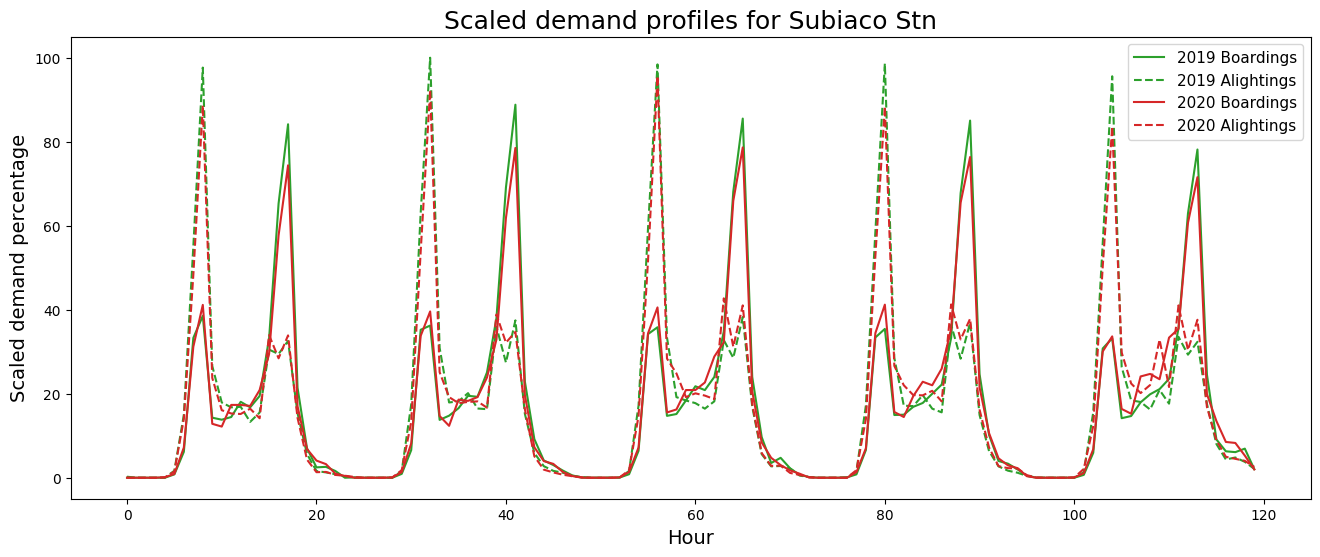

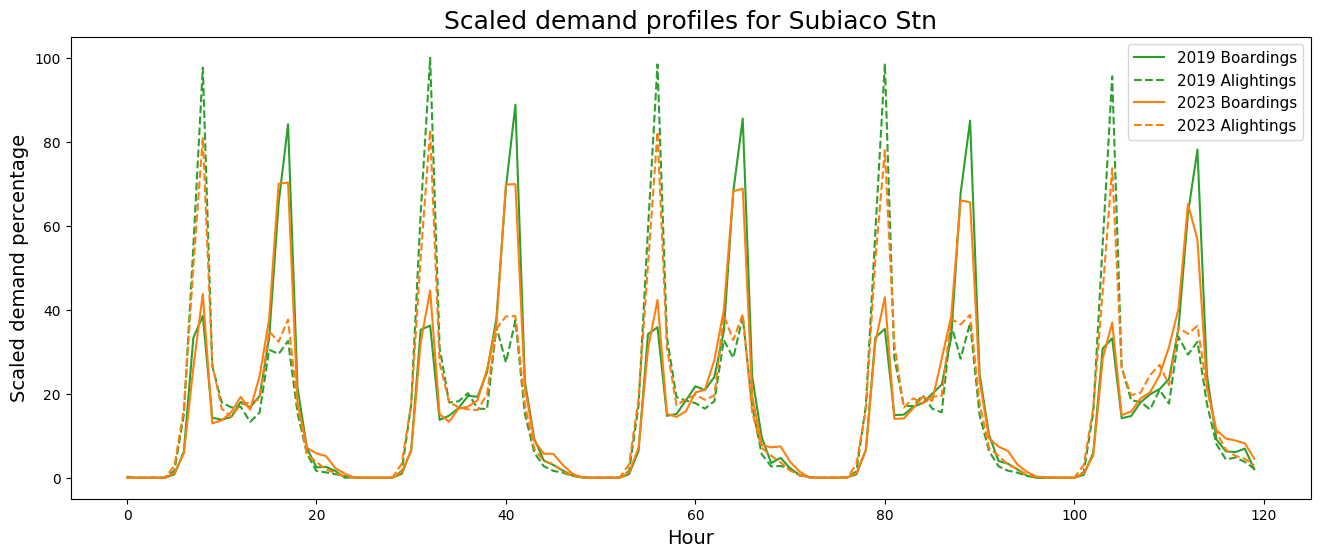

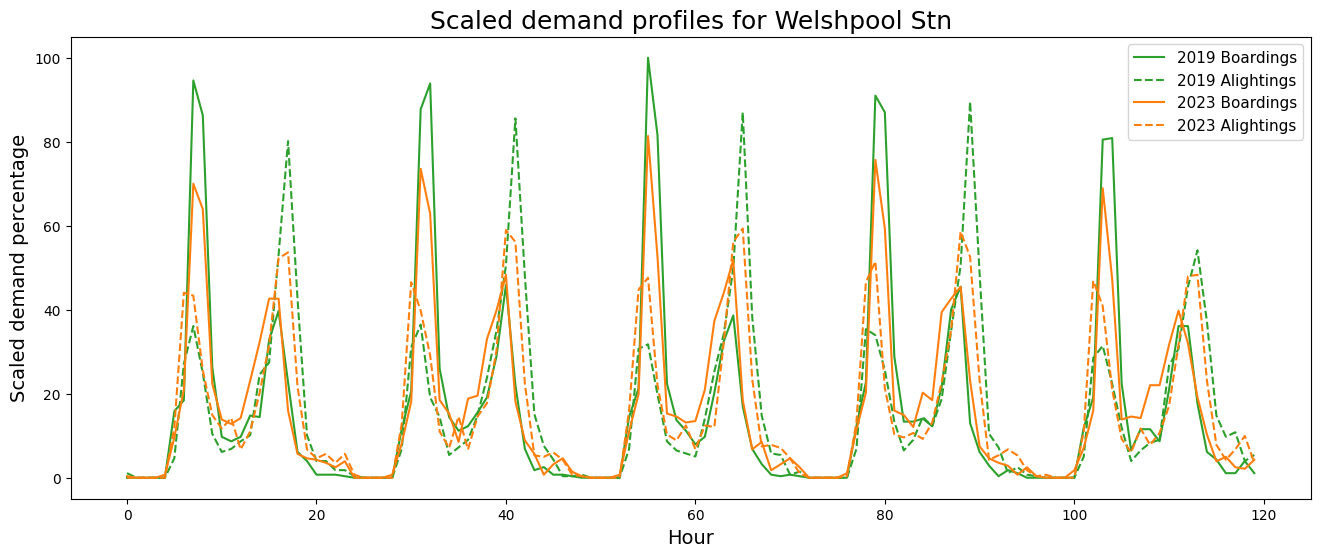

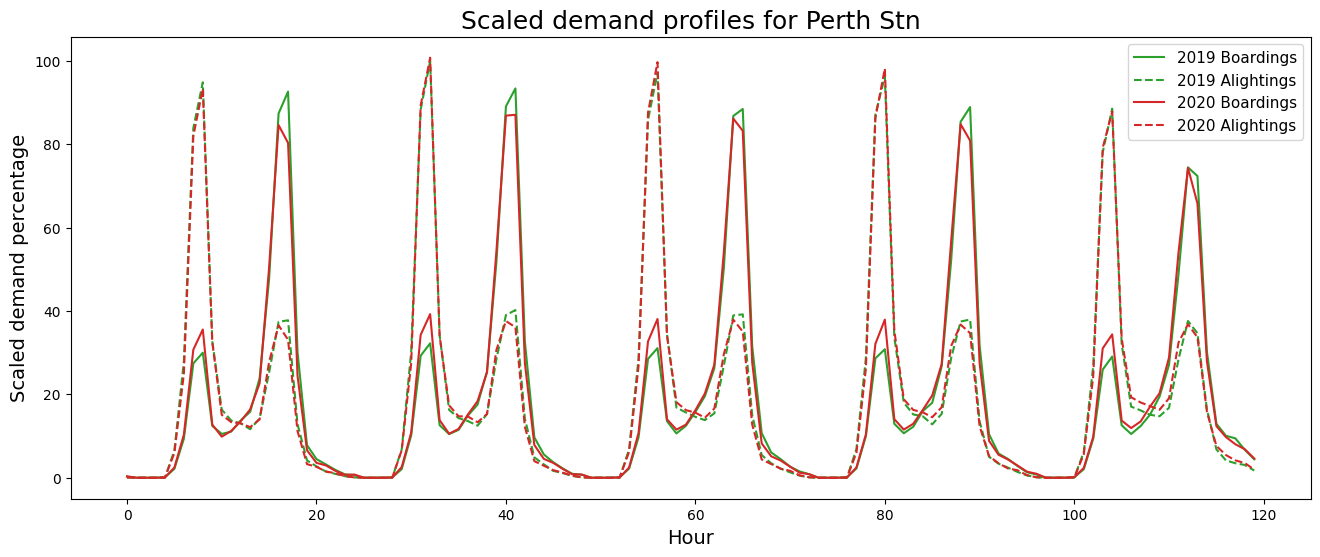

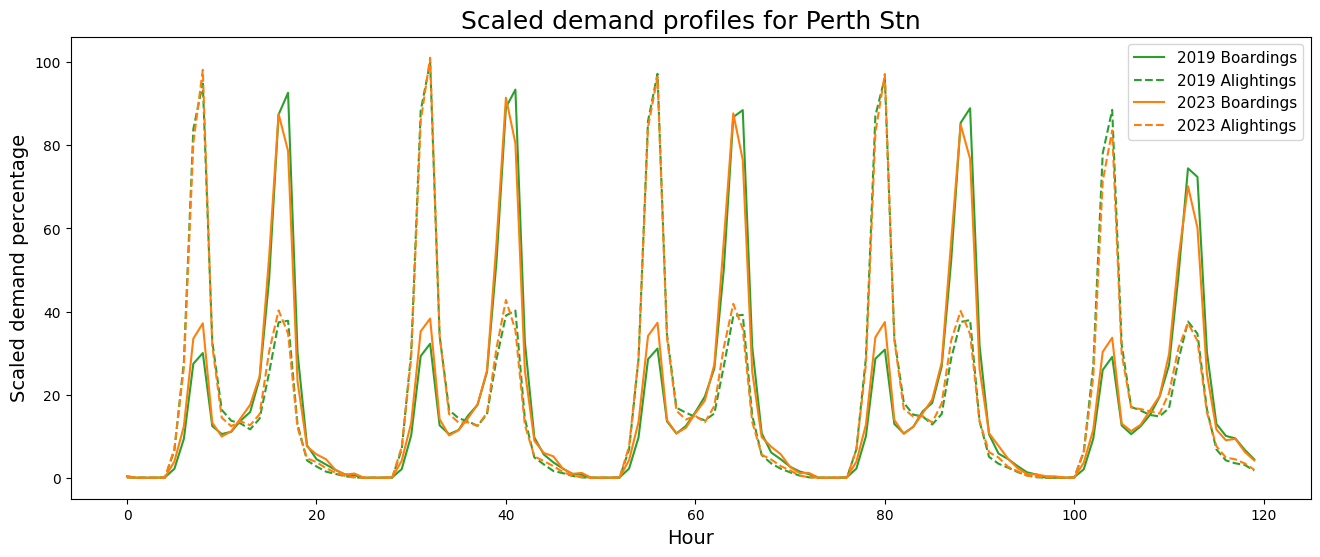

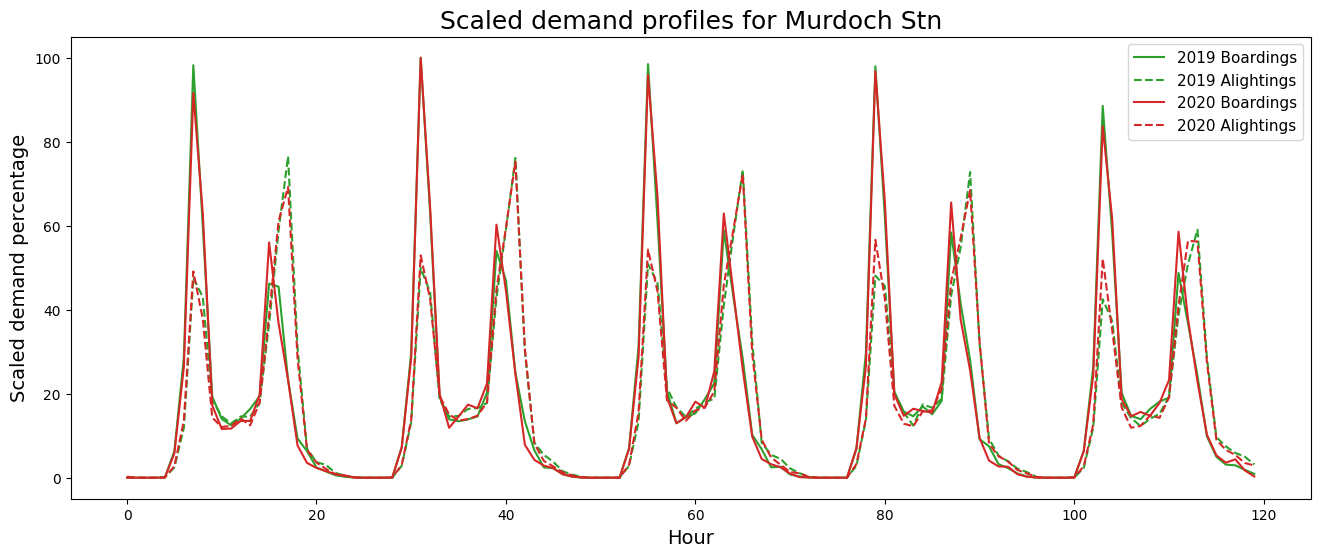

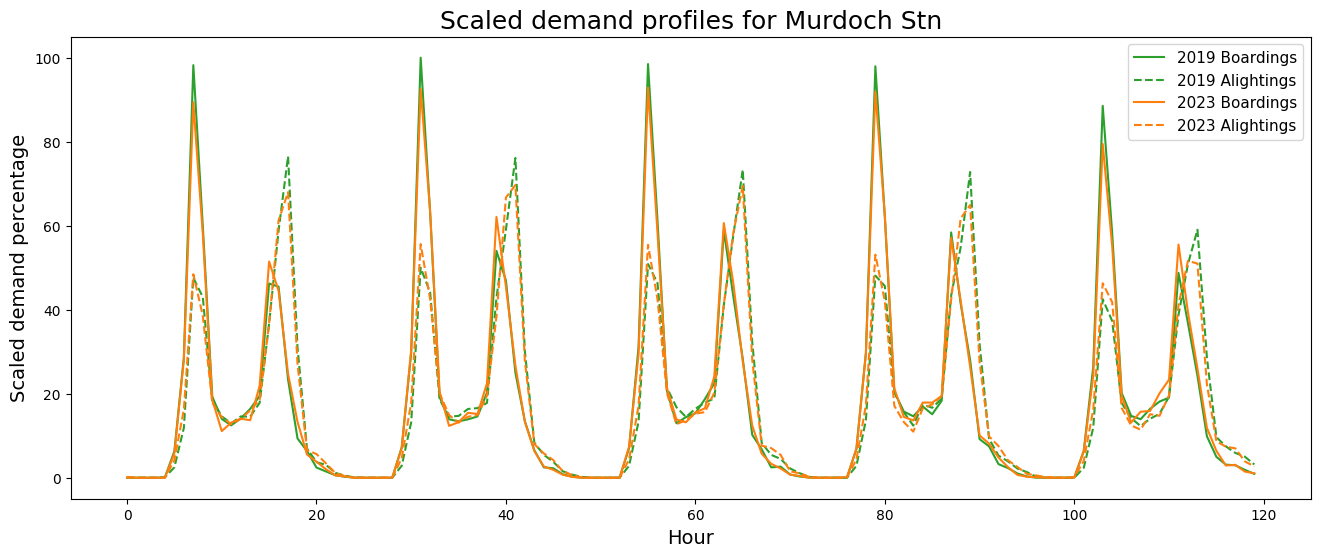

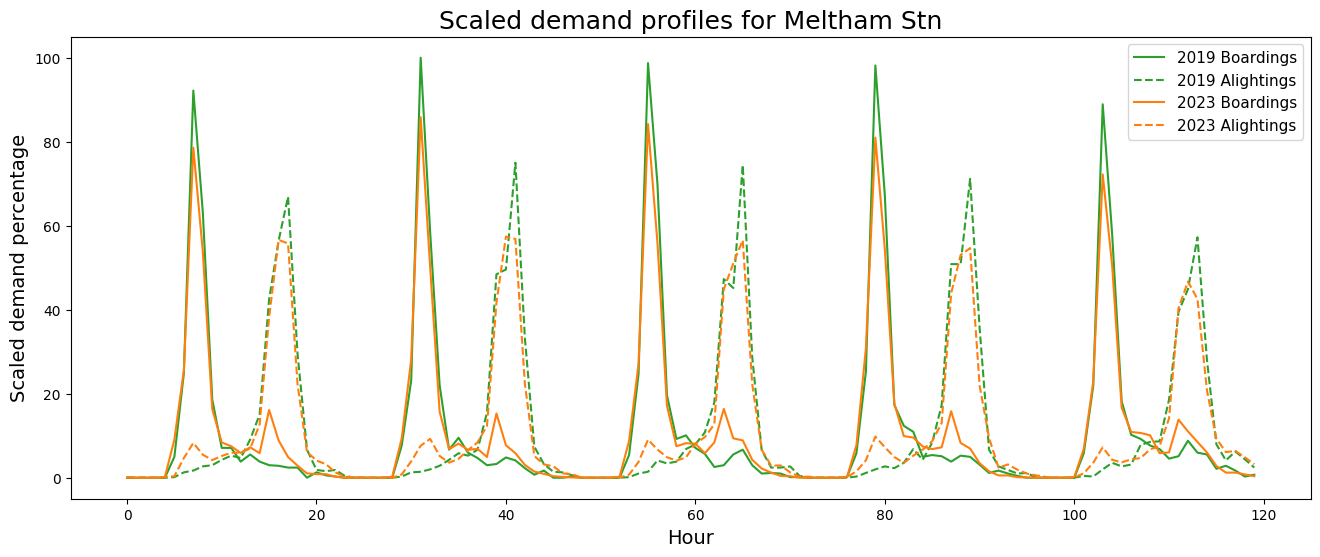

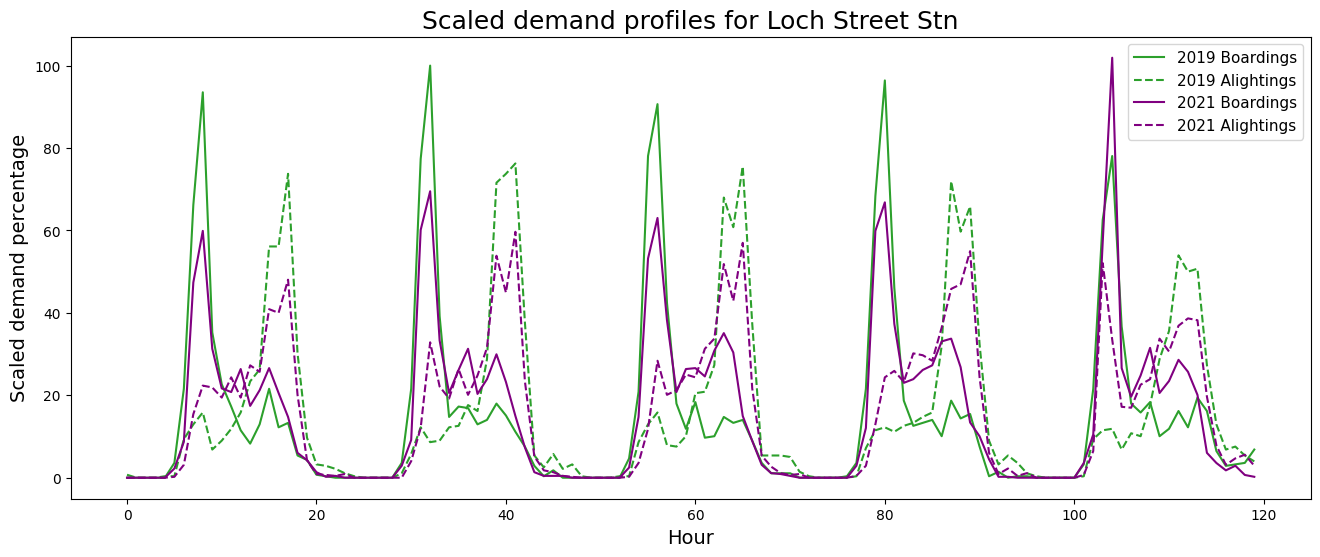

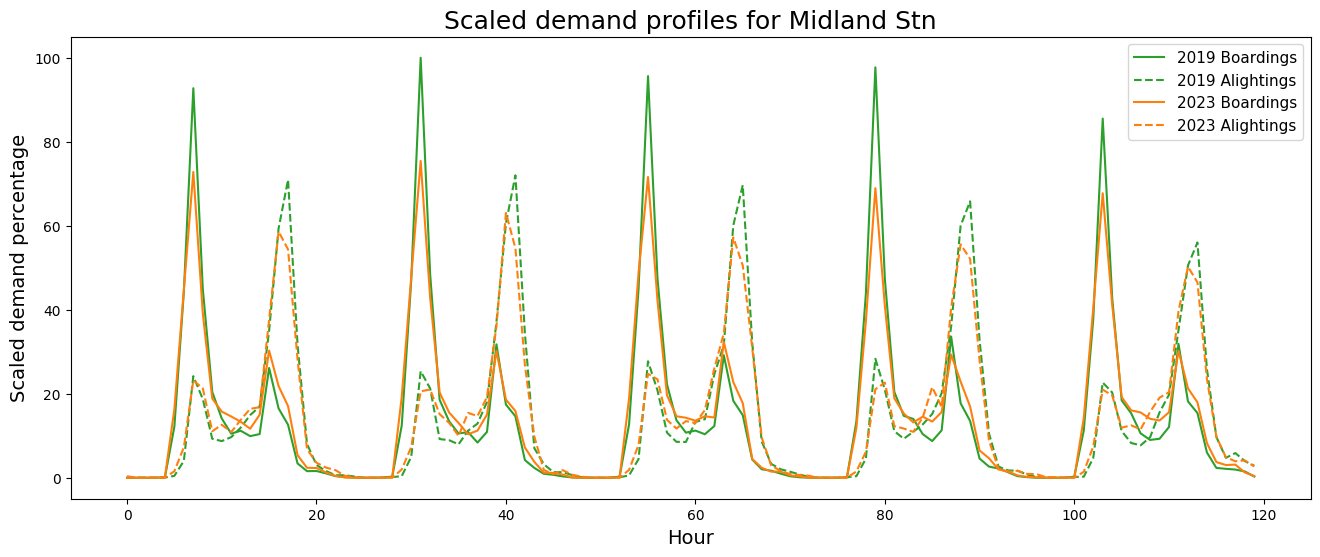

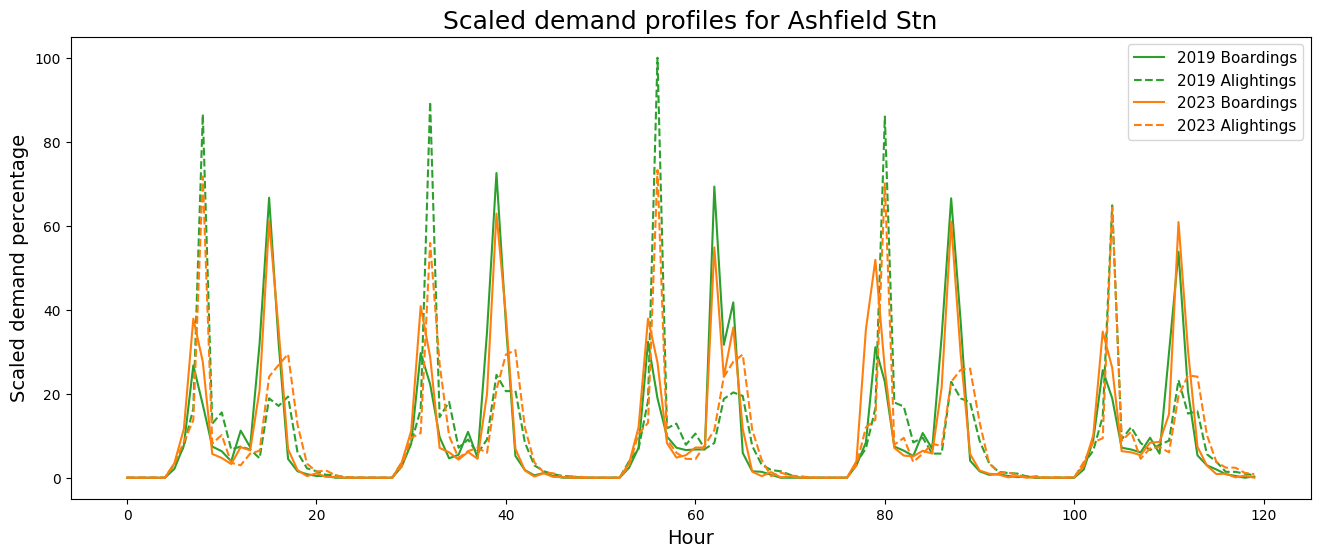

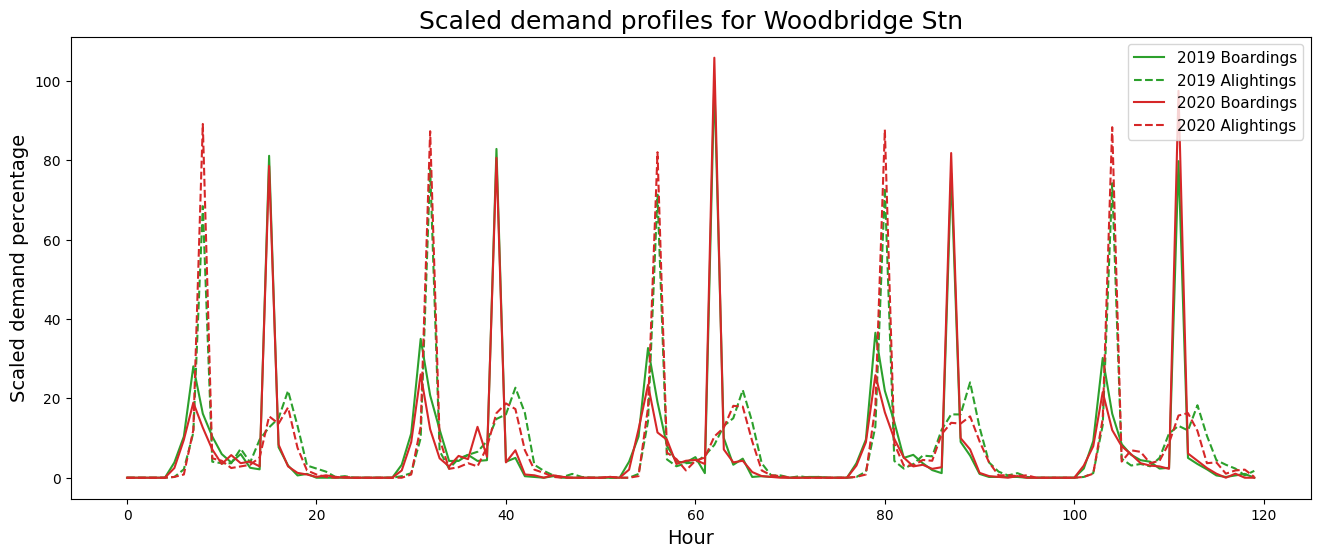

In [92]:
multi_weekly_profile(profilelist, infolist, 22, stoplocations, [2019, 2020, '', '', ''])
multi_weekly_profile(profilelist, infolist, 22, stoplocations, [2019, '', '', '', 2023])
multi_weekly_profile(profilelist, infolist, 4, stoplocations, [2019, '', '', '', 2023])
multi_weekly_profile(profilelist, infolist, 17, stoplocations, [2019, 2020, '', '', ''])
multi_weekly_profile(profilelist, infolist, 17, stoplocations, [2019, '', '', '', 2023])
multi_weekly_profile(profilelist, infolist, 48, stoplocations, [2019, 2020, '', '', ''])
multi_weekly_profile(profilelist, infolist, 48, stoplocations, [2019, '', '', '', 2023])


multi_weekly_profile(profilelist, infolist, 59, stoplocations, [2019, '', '', '', 2023])
multi_weekly_profile(profilelist, infolist, 26, stoplocations, [2019, '', 2021, '', ''])
multi_weekly_profile(profilelist, infolist, 67, stoplocations, [2019, '', '', '', 2023])
multi_weekly_profile(profilelist, infolist, 61, stoplocations, [2019, '', '', '', 2023])
multi_weekly_profile(profilelist, infolist, 66, stoplocations, [2019, 2020, '', '', ''])
